<a href="https://colab.research.google.com/github/tincho-mehaudy/DMCyT/blob/master/TP2/Tarea5_TP2_CyT_Quique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Para visualización en notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_context('poster')
mpl.rcParams['figure.figsize'] = (8,6)

# Números y Datos
import numpy as np
import pandas as pd

import networkx as nx

from glob import glob
from pathlib import Path

import scipy 
from scipy import stats as st
from scipy.stats import sem

In [ ]:
# carga de datos

!wget -q https://www.dropbox.com/s/eei6gnw10o20mcn/DataSujetos.zip?dl=1 -O DataSujetos.zip
!unzip -q DataSujetos

In [ ]:
# un sujeto en estado N1

filename = '/content/DataSujetos/N1_suj1.csv'
df = pd.read_csv(filename, header=None)
n = df.shape[0]
df -= np.diag(np.ones(n)) # creo que esta línea pone 0 en la diagonal, si no al graficar la diagonal aparece como la más correlacionada

### Abrir todos los sujetos de un estado

In [ ]:
def subjectmatrix2graphslist(filename, densities):
    """
    Toma un archivo csv con la matriz de input y devuelve una lista de grafos con la densisdad de aristas correspondiente
    """
    
    correlation_matrix = pd.read_csv(filename, header=None)
    n = correlation_matrix.shape[0]
    correlation_matrix -= np.diag(np.ones(n))
    max_links = (n*n-n)//2
    tril_idx = np.tril_indices(n,-1)
    sorted_correlations = sorted(correlation_matrix.values[tril_idx].flatten(),reverse=True)
    
    Gs = []
    for d in densities:
        idx = int(d*max_links)
        threshold = sorted_correlations[idx]
        Gs.append(nx.from_pandas_adjacency(correlation_matrix>=threshold))
        
    return Gs

In [ ]:
files = [Path('DataSujetos').glob('N1_*.csv'),Path('DataSujetos').glob('N2_*.csv'),Path('DataSujetos').glob('N3_*.csv'),Path('DataSujetos').glob('W_*.csv')]
densities = np.linspace(0.025,0.15,6) #propuesta Paper
#densities = np.linspace(0.1,0.4,10) #Originalle
all_graphs = [{},{},{},{}]

for i in range(4):
  filenames = files[i]
  graphs = all_graphs[i]
  for filename in filenames:
    Gs = subjectmatrix2graphslist(filename, densities)
    name = Path(filename).stem
    graphs[name] = Gs

In [ ]:
filenamesN1 = list(Path('DataSujetos').glob('N1_*.csv'))
filenamesN2 = list(Path('DataSujetos').glob('N2_*.csv'))
filenamesN3 = list(Path('DataSujetos').glob('N3_*.csv'))
filenamesW = list(Path('DataSujetos').glob('W_*.csv'))


In [ ]:
def matriz_promedio_estadio(filenames):
  matrices_estadio = []
  n = 0
  for file in filenames:
    matrix = np.array(pd.read_csv(file, header=None))
    n = matrix.shape[0]
    matrices_estadio.append(matrix)
  
  cubo = np.reshape(matrices_estadio, (len(matrices_estadio), n, n))
  return np.mean(cubo, axis=0)



In [ ]:
promedioN1= matriz_promedio_estadio(filenamesN1) - np.diag(np.ones(116))
promedioN2= matriz_promedio_estadio(filenamesN2) - np.diag(np.ones(116))
promedioN3= matriz_promedio_estadio(filenamesN3) - np.diag(np.ones(116))
promedioW= matriz_promedio_estadio(filenamesW) - np.diag(np.ones(116))

In [ ]:
promedioW

array([[0.        , 0.87569278, 0.64017944, ..., 0.48161078, 0.41380233,
        0.18836041],
       [0.87569278, 0.        , 0.58573778, ..., 0.46867224, 0.37485122,
        0.20016894],
       [0.64017944, 0.58573778, 0.        , ..., 0.44053111, 0.39942394,
        0.22534317],
       ...,
       [0.48161078, 0.46867224, 0.44053111, ..., 0.        , 0.74975833,
        0.30331111],
       [0.41380233, 0.37485122, 0.39942394, ..., 0.74975833, 0.        ,
        0.35570383],
       [0.18836041, 0.20016894, 0.22534317, ..., 0.30331111, 0.35570383,
        0.        ]])

In [ ]:
# PENDIENTE

# Visualizar la estructura de las redes pesadas a partir de los datos promedio para cada
#estadío del sueño (despierto -W- y N1, N2, N3).

# ANTES DE ARMAR GRAFOS POR DENSIDADES --> HACER HEATMAPS
def heatmap(grafo_ponderado, titulo):
  plt.figure(figsize = (10,8))
  n = grafo_ponderado.shape[0]
  sns.heatmap(grafo_ponderado);
  plt.title(titulo)
  plt.xlim(0,n)
  plt.ylim(0,n)
  return



In [ ]:
heatmap(promedioN1, 'Primer estadío de sueño')

In [ ]:
heatmap(promedioN2, 'Segundo estadío de sueño')

In [ ]:
heatmap(promedioN3, 'Tercer estadío de sueño')

In [ ]:
heatmap(promedioW, 'Estadío despierto')

In [ ]:
def subjectmatrix2graphslist_para_matrices(matrix, densities):
    """
    Toma una matriz de input y devuelve una lista de grafos con la densisdad de aristas correspondiente
    """
    
    correlation_matrix = pd.DataFrame(matrix)
    n = correlation_matrix.shape[0]
    max_links = (n*n-n)//2
    tril_idx = np.tril_indices(n,-1)
    sorted_correlations = sorted(correlation_matrix.values[tril_idx].flatten(),reverse=True)
    
    Gs = []
    for d in densities:
        idx = int(d*max_links)
        threshold = sorted_correlations[idx]
        Gs.append(nx.from_pandas_adjacency(correlation_matrix>=threshold))
        
    return Gs

In [ ]:
#Me armo los grafos con las densidades propuestas

densities = [0.025,0.05,0.075,0.1, 0.125, 0.15]
MN1 = subjectmatrix2graphslist_para_matrices(promedioN1, densities)
MN2 = subjectmatrix2graphslist_para_matrices(promedioN2, densities)
MN3 = subjectmatrix2graphslist_para_matrices(promedioN3, densities)
MW = subjectmatrix2graphslist_para_matrices(promedioW, densities)

NameError: ignored

In [ ]:
#Alternativa de print para que no nos escupa los prints si no queremos

def printif(hidden, object):
  if not hidden:
    print(object)
    return

In [ ]:
#Defino función generadora de Períodos
def generar_Periodo(periodo, densidades, hide = True):
  global cclustering
  global bet
  #gobal eig
  global closeness
  global degree
  for i in range(len(densidades)):
    printif(hide, object = 'density ='+str(densities[i]))
    G = periodo[i]
    printif(hide,nx.info(G))
    j = 0
    tamanio = 0
    for x in nx.connected_components(G):
      j += 1
      tamanio = max(tamanio, len(x))

    printif(hide, 'numero de componentes conexas = '+str(j))
    printif(hide,'Tamaño de la componente más grande = '+str(tamanio))
    cclustering.append(nx.average_clustering(G))

    betweeness_centrality = [d for a,d in nx.betweenness_centrality(G).items()]
    avg_betweeness_centrality = sum(betweeness_centrality)/len(betweeness_centrality)
    bet.append(avg_betweeness_centrality)


    ###Esto no corre en W, por eso está comentado
    #eigenvector_centrality = [d for a,d in nx.eigenvector_centrality(G).items()]
    #avg_eigenvector_centrality = sum(eigenvector_centrality)/len(eigenvector_centrality)
    #eig.append(avg_eigenvector_centrality)

    closeness_centrality = [d for a,d in nx.closeness_centrality(G).items()]
    avg_closeness_centrality = sum(closeness_centrality)/len(closeness_centrality)
    closeness.append(avg_closeness_centrality)

    degree_centrality = [d for a,d in nx.degree_centrality(G).items()]
    avg_degree_centrality = sum(degree_centrality)/len(degree_centrality)
    degree.append(avg_degree_centrality)
 
    printif(hide,'grado: ')
    printif(hide, nx.degree(G))
    #shortest_path_length de las componentes conexas
    printif(hide, 'Caminos más cortos promedio de cada componente')
    caminos_mas_cortos_promedios = []
    for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
      caminos_mas_cortos_promedios.append(nx.average_shortest_path_length(C))
    printif(hide, caminos_mas_cortos_promedios)
  
    printif(hide,'')

In [ ]:
#Defino algunos campos de centralidad
Periodo = ['N1']*len(densities)+['N2']*len(densities)+['N3']*len(densities)+['W']*len(densities)
cclustering = []
bet = []
#eig = []
closeness = []
degree = []

In [ ]:
#Correr solo si queremos que nos imprima todo

#Periodo = ['N1']*len(densities)+['N2']*len(densities)+['N3']*len(densities)+['W']*len(densities)
#cclustering = []
#bet = []
######eig = []
#closeness = []
#degree = []
#generar_Periodo(MN1, densities, hide = False)


In [ ]:
#generar_Periodo(MN2, densities, hide = False)


In [ ]:
#generar_Periodo(MN3, densities, hide = False)


In [ ]:
#generar_Periodo(MW, densities, hide = False)

In [ ]:
#Genero los períodos sin imprimir nada (Si queremos volver a generarlos, redefinir los campos de centralidad para que la lista se resetee)
generar_Periodo(MN1, densities)
generar_Periodo(MN2, densities)
generar_Periodo(MN3, densities)
generar_Periodo(MW, densities)

In [ ]:
# Sobre los datos: promedio, extraer medidas de centralidad, grado, camino mínimo, 
# y coeficiente de clustering en función de la densidad de aristas en función de δ.
# PENDIENTE:  falta calcular camino mínimo para las componentes conexas más grandes -> Check
# Preguntar si centralidad de closeness alacanza

In [ ]:
data_centralizada = pd.DataFrame({'Densidad': list(densities)*4, 'Periodo': Periodo, 'Coef_clustering_promedio':cclustering, 'Centralidad_betweeness_promedio':bet, 'Centralidad_por_cercanía_promedio':closeness, 'Centralidad_de_grado_promedio':degree})
#Agregar 'Centralidad_de_autovector_promedio':eig si se le puede calcular la centralidad de autovector a Wake

In [ ]:
#Veamos todo el dataset armado
data_centralizada

Densidad  ... Centralidad_de_grado_promedio
0      0.025  ...                      0.025037
1      0.050  ...                      0.050075
2      0.075  ...                      0.075112
3      0.100  ...                      0.100150
4      0.125  ...                      0.125037
5      0.150  ...                      0.150075
6      0.025  ...                      0.025037
7      0.050  ...                      0.050075
8      0.075  ...                      0.075112
9      0.100  ...                      0.100150
10     0.125  ...                      0.125037
11     0.150  ...                      0.150075
12     0.025  ...                      0.025037
13     0.050  ...                      0.050075
14     0.075  ...                      0.075112
15     0.100  ...                      0.100150
16     0.125  ...                      0.125037
17     0.150  ...                      0.150075
18     0.025  ...                      0.025037
19     0.050  ...                      0.050075
20     0.075  ...                      0.075112
21     0.100  ...                      0.100150
22     0.125  ...                      0.125037
23     0.150  ...                      0.150075

[24 rows x 6 columns]

In [ ]:
dataN1 = data_centralizada[data_centralizada.Periodo == 'N1']
dataN2 = data_centralizada[data_centralizada.Periodo == 'N2']
dataN3 = data_centralizada[data_centralizada.Periodo == 'N3']
dataW = data_centralizada[data_centralizada.Periodo == 'W']

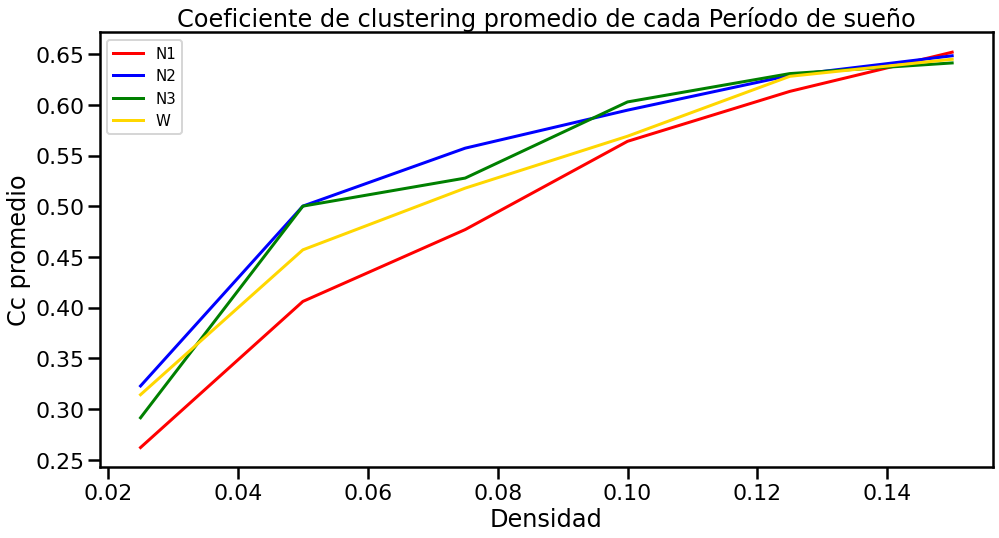

In [ ]:

fig, ax = plt.subplots()
ax.plot('Densidad', 'Coef_clustering_promedio', color = 'red',data = dataN1, label='N1')
ax.plot('Densidad', 'Coef_clustering_promedio', color = 'blue',data = dataN2, label='N2')
ax.plot('Densidad', 'Coef_clustering_promedio', color = 'green',data = dataN3, label='N3')
ax.plot('Densidad', 'Coef_clustering_promedio', color = 'gold',data = dataW, label='W')
ax.set_xlabel('Densidad')
ax.set_ylabel('Cc promedio')
#ax.plot(a, c + d, 'k', label='Total message length')

legend = ax.legend(loc='upper left', shadow=False, fontsize='15')
fig.set_figwidth(16)
fig.set_figheight(8)
# Put a nicer background color on the legend.
legend.get_frame()
plt.title('Coeficiente de clustering promedio de cada Período de sueño')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot('Densidad', 'Centralidad_betweeness_promedio', color = 'red',data = dataN1, label='N1')
ax.plot('Densidad', 'Centralidad_betweeness_promedio', color = 'blue',data = dataN2, label='N2')
ax.plot('Densidad', 'Centralidad_betweeness_promedio', color = 'green',data = dataN3, label='N3')
ax.plot('Densidad', 'Centralidad_betweeness_promedio', color = 'gold',data = dataW, label='W')
ax.set_xlabel('Densidad')
ax.set_ylabel('Betweeness promedio')
#ax.plot(a, c + d, 'k', label='Total message length')

legend = ax.legend(loc='upper left', shadow=False, fontsize='15')
fig.set_figwidth(16)
fig.set_figheight(8)
# Put a nicer background color on the legend.
legend.get_frame()
plt.title('Centralidad betweeness promedio de cada Período de sueño')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot('Densidad', 'Centralidad_por_cercanía_promedio', color = 'red',data = dataN1, label='N1')
ax.plot('Densidad', 'Centralidad_por_cercanía_promedio', color = 'blue',data = dataN2, label='N2')
ax.plot('Densidad', 'Centralidad_por_cercanía_promedio', color = 'green',data = dataN3, label='N3')
ax.plot('Densidad', 'Centralidad_por_cercanía_promedio', color = 'gold',data = dataW, label='W')
ax.set_xlabel('Densidad')
ax.set_ylabel('Cercanía promedio')
#ax.plot(a, c + d, 'k', label='Total message length')

legend = ax.legend(loc='upper left', shadow=False, fontsize='15')
fig.set_figwidth(16)
fig.set_figheight(8)
# Put a nicer background color on the legend.
legend.get_frame()
plt.title('Centralidad de cercanía promedio de cada Período de sueño')
plt.show()




In [ ]:
def centralidad_grado(Gs, titulo):
  fig, axs = plt.subplots(2,2,figsize=(20,20))
  pos_1 = nx.spring_layout(Gs[0],k=0.2)
  pos_2 = nx.spring_layout(Gs[2],k=0.2)
  pos_3 = nx.spring_layout(Gs[3],k=0.2)
  pos_4 = nx.spring_layout(Gs[5],k=0.2)



  centrality = nx.degree_centrality(Gs[0])
  values = [v for n,v in centrality.items()]
  nx.draw(Gs[0],pos=pos_1, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray',ax=axs[0,0])
  sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=min(values), vmax=max(values))); sm.set_array([]); cbar = plt.colorbar(sm,ax=axs[0,0])
  axs[0,0].set_title('densidad = 0,025');

  centrality = nx.degree_centrality(Gs[2])
  values = [v for n,v in centrality.items()]
  nx.draw(Gs[2],pos=pos_2, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray',ax=axs[0,1])
  axs[0,1].set_title('densidad = 0,075');
  sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=min(values), vmax=max(values))); sm.set_array([]); cbar = plt.colorbar(sm,ax=axs[0,1])
  
  centrality = nx.degree_centrality(Gs[3])
  values = [v for n,v in centrality.items()]
  nx.draw(Gs[3],pos=pos_3, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray',ax=axs[1,0])
  sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=min(values), vmax=max(values))); sm.set_array([]); cbar = plt.colorbar(sm,ax=axs[1,0])
  axs[1,0].set_title('densidad = 0,1');

  centrality = nx.degree_centrality(Gs[5])
  values = [v for n,v in centrality.items()]
  nx.draw(Gs[5],pos=pos_4, with_labels=True, font_weight='bold',node_color = values, font_color='white', edge_color='gray',ax=axs[1,1])
  sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=min(values), vmax=max(values))); sm.set_array([]); cbar = plt.colorbar(sm,ax=axs[1,1])
  axs[1,1].set_title('densidad = 0,15');

  plt.suptitle(titulo,y=1.0)
  plt.tight_layout();
  return




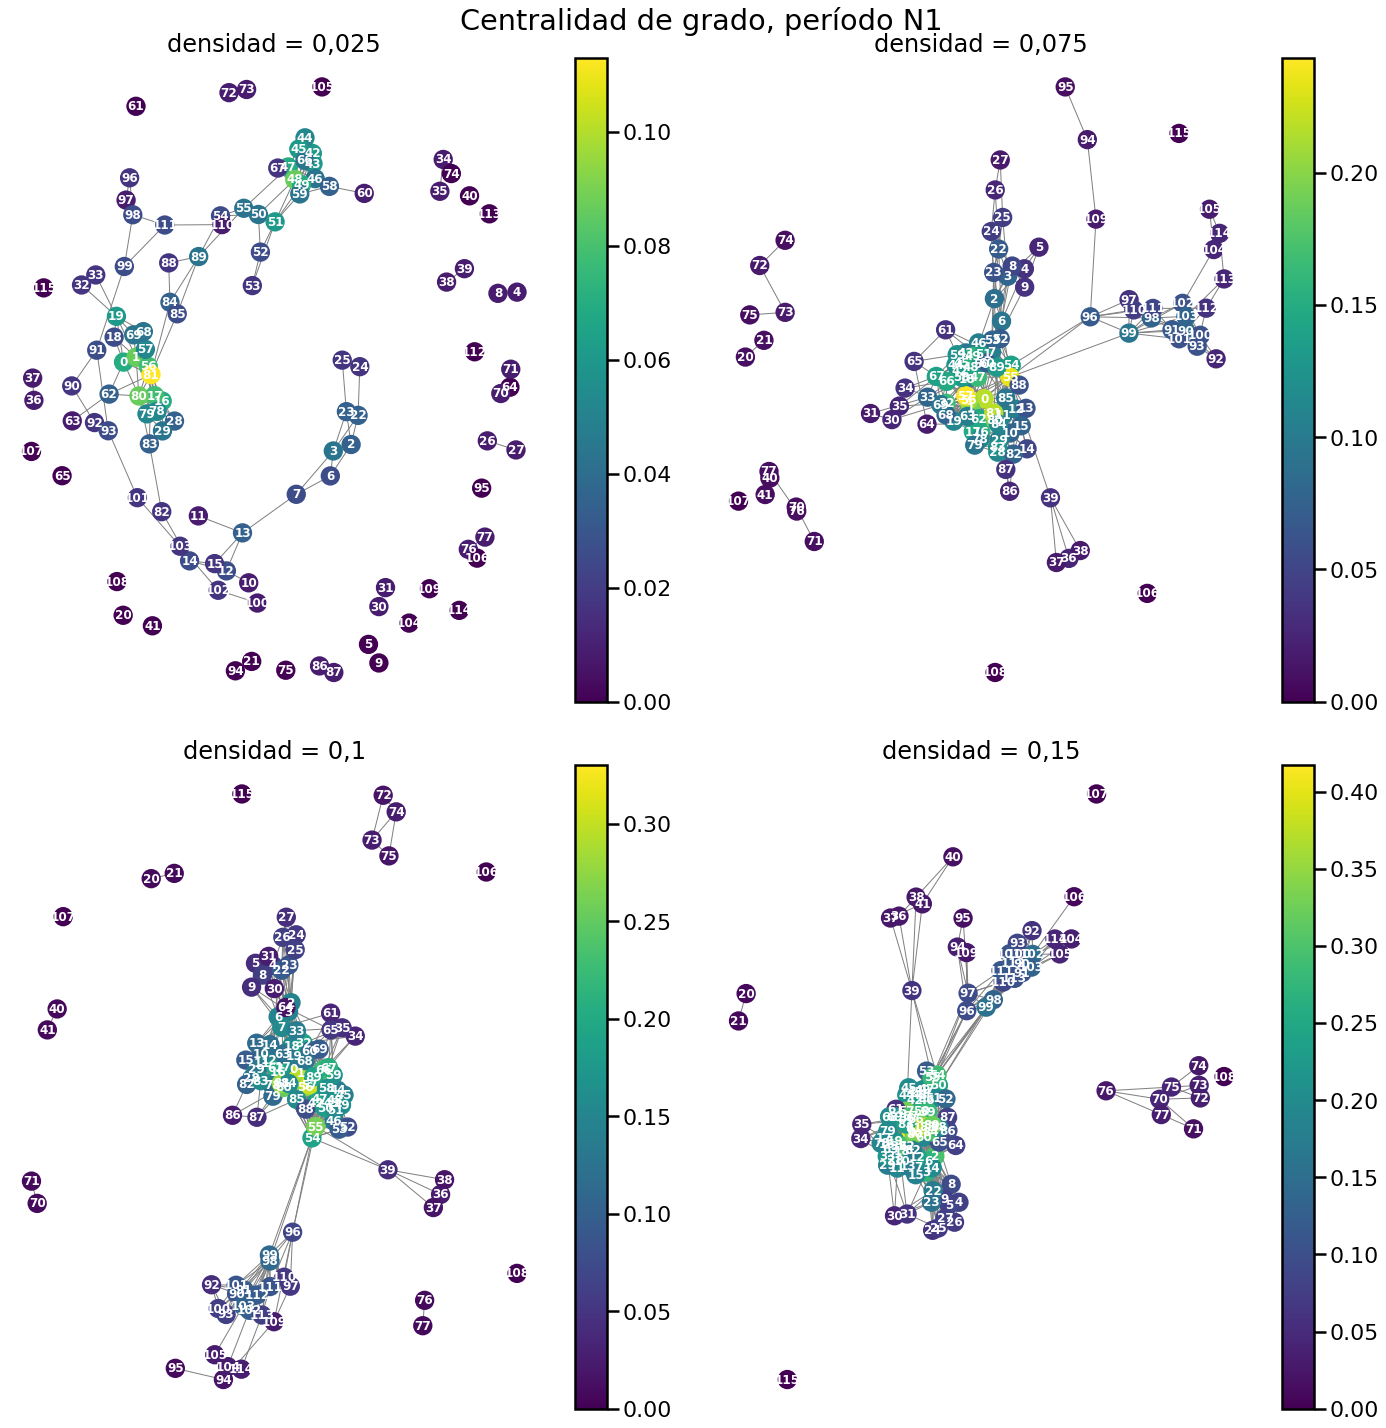

In [ ]:
centralidad_grado(MN1, 'Centralidad de grado, período N1')

In [ ]:
centralidad_grado(MN2, 'Centralidad de grado, período N2')

In [ ]:
centralidad_grado(MN3, 'Centralidad de grado, período N3')

In [ ]:
centralidad_grado(MW, 'Centralidad de grado, período despierto')

In [ ]:
def generar_redes(per, i):
  print('Densidad ',densities[i])
  G = per[i]
  plt.figure(figsize=(32,8))
  plt.subplot(131)
  nx.draw(G, with_labels=True, font_weight='bold')
  plt.title('spring')
  plt.subplot(132)
  layout=nx.fruchterman_reingold_layout(G)
  nx.draw(G,layout, with_labels=True, font_weight='bold')
  plt.title('fruchterman reingold')
  plt.subplot(133)
  layout=nx.circular_layout(G)
  nx.draw(G,layout, with_labels=True, font_weight='bold')
  plt.title('circular');

In [ ]:
#print('Período N1')
#generar_redes(MN1, 3)

In [ ]:
#generar_redes(MN1, 5)

In [ ]:
#print('Período N2')
#generar_redes(MN2, 3)

In [ ]:

#generar_redes(MN2, 5)

In [ ]:
#print('Período N3')
#generar_redes(MN3, 3)

In [ ]:
#generar_redes(MN3, 5)

In [ ]:
#print('Período W')
#generar_redes(MW, 3)

In [ ]:
#generar_redes(MW, 5)

In [ ]:
# PENDIENTE: Visualizar el grafo no pesado para distintos valores de δ que resulten interesantes.
#Check

### Louvian

In [ ]:
def fcomunidadesxestadio (MN):
  modulosN=[]
  for grafo in MN:
    modulosN.append(community.best_partition(grafo))
  return modulosN
    


In [ ]:
import community

def graficoComunidades (MN):
  modulosN3=fcomunidadesxestadio(MN)
  i=0;
  fig, axs = plt.subplots(6,1,figsize=(16,50))
  col=0;
  for modulos in modulosN3:
    
    values_per = [v for n,v in modulos.items()]
    pos_obs = nx.spring_layout(MN[i],k=0.4)
    nx.draw(MN[i],pos=pos_obs, with_labels=True,cmap=plt.cm.tab10,font_weight='bold',node_color = values_per, font_color='white', edge_color='gray',ax=axs[i])
  
    axs[i].set_title('Comunidades con densidad: ' + str(densities[i]));
    i=i+1
  plt.tight_layout();


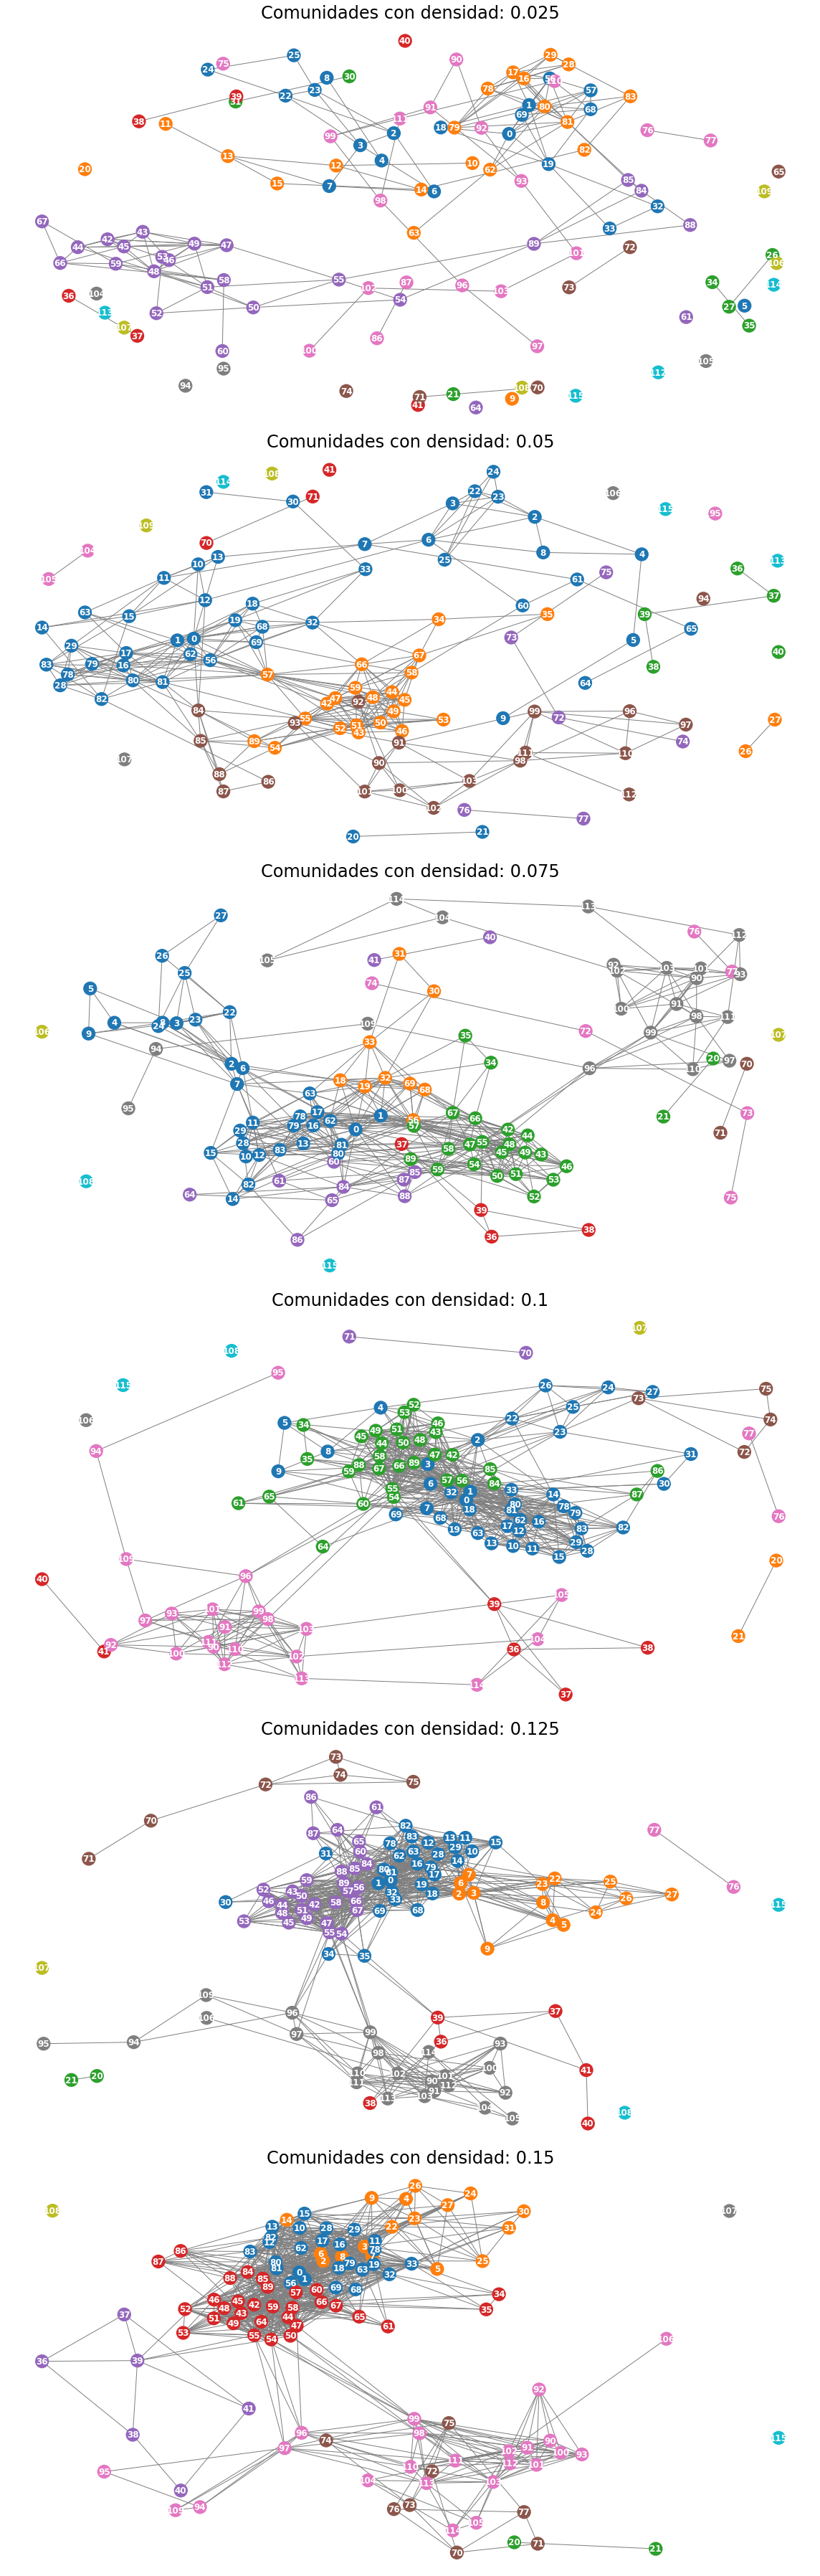

In [ ]:

graficoComunidades(MN1)


In [ ]:
graficoComunidades(MN2)


In [ ]:
graficoComunidades(MN3)

In [ ]:
graficoComunidades(MW)

In [ ]:
# PENDIENTE CALCULAR COEFICIENTE DE MODULARIDAD PARA CADA ESTADIO CADA DENSIDAD


In [ ]:
#def partition_set_to_dict(m):
    #d = {}
    #for i,c in enumerate(m):
     #   print(m)
     #   for n in c:
     #       d[n] = i
    #return d

Graficamos el coeficiente de modularidad según las distintas densidades

In [ ]:
def graficoDensidadesxModularidad (MN, titulo):
  modulos = fcomunidadesxestadio(MN)
  modulos=list(modulos)
  modularity = []
  i=0
  for m in modulos:
      modularity.append(community.modularity(m,MN[i]))
      i=i+1
  plt.plot(densities,modularity);

  plt.xlabel('Densidades')
  plt.ylabel('Coeficiente de Modularidad')
  plt.title(titulo)

  idx = np.argmax(modularity)
  m = modulos[idx]

#graficoDensidadesxModularidad(MN1, 'Modularidad período N1')

In [ ]:
graficoDensidadesxModularidad(MN2, 'Modularidad período N2')

In [ ]:
graficoDensidadesxModularidad(MN3, 'Modularidad período N3')

In [ ]:
graficoDensidadesxModularidad(MN3, 'Modularidad período despierto')

##Tarea 5


In [ ]:
def generar_comunidades(M):
  c = fcomunidadesxestadio(M)
  total_communities = []
  for n in range(len(c)):
    communities = []
    for x in list(set([b for a,b in c[n].items()])):
      community = []
      for a,b in c[n].items():
        if b == x:
          community.append(a)
      communities.append(community)
    total_communities.append(communities)
  return(total_communities)






In [ ]:
files = [Path('DataSujetos').glob('N1_*.csv'),Path('DataSujetos').glob('N2_*.csv'),Path('DataSujetos').glob('N3_*.csv'),Path('DataSujetos').glob('W_*.csv')]
densities = np.linspace(0.025,0.15,6) #propuesta Paper
#densities = np.linspace(0.1,0.4,10) #Originalle
all_graphs = [{},{},{},{}]

for i in range(4):
  filenames = files[i]
  graphs = all_graphs[i]
  for filename in filenames:
    Gs = subjectmatrix2graphslist(filename, densities)
    name = Path(filename).stem
    graphs[name] = Gs

In [ ]:

namesN1 = []
for i in range(1,19):
  namesN1.append('N1_suj' + str(i))

namesN2 = []
for i in range(1,19):
  namesN2.append('N2_suj' + str(i))

namesN3 = []
for i in range(1,19):
  namesN3.append('N3_suj' + str(i))

namesW = []
for i in range(1,19):
  namesW.append('W_suj' + str(i))

totnames = [namesN1,namesN2,namesN3,namesW]

In [ ]:
sujlist = []
for i in range(1,19):
  sujlist += [i]*116

In [ ]:
MN1D0 = pd.DataFrame({'Nodo' : list(range(116))*18, 'Sujeto': sujlist, 'degree' : sujlist, 'comunidad' : sujlist, 'intramodular_degree' : sujlist, 'z_score' : sujlist, 'coeficiente_de_participacion' : sujlist, 'Rol' : ['']*116*18})

In [ ]:
MN1D1 = MN1D0.copy()
MN1D2 = MN1D0.copy()
MN1D3 = MN1D0.copy()
MN1D4 = MN1D0.copy()
MN1D5 = MN1D0.copy()
MN1L = [MN1D0,MN1D1,MN1D2,MN1D3,MN1D4,MN1D5]

MN2D0 = MN1D0.copy()
MN2D1 = MN1D0.copy()
MN2D2 = MN1D0.copy()
MN2D3 = MN1D0.copy()
MN2D4 = MN1D0.copy()
MN2D5 = MN1D0.copy()
MN2L = [MN2D0,MN2D1,MN2D2,MN2D3,MN2D4,MN2D5]


MN3D0 = MN1D0.copy()
MN3D1 = MN1D0.copy()
MN3D2 = MN1D0.copy()
MN3D3 = MN1D0.copy()
MN3D4 = MN1D0.copy()
MN3D5 = MN1D0.copy()
MN3L = [MN3D0,MN3D1,MN3D2,MN3D3,MN3D4,MN3D5]


MWD0 = MN1D0.copy()
MWD1 = MN1D0.copy()
MWD2 = MN1D0.copy()
MWD3 = MN1D0.copy()
MWD4 = MN1D0.copy()
MWD5 = MN1D0.copy()
MWL = [MWD0,MWD1,MWD2,MWD3,MWD4,MWD5]

ML = [MN1L, MN2L,MN3L,MWL]



In [ ]:
#Defino el grado 

for r in range(4):
  M = ML[r]
  names = totnames[r]
  degree = []
  for a in range(6):
    degree.append([])
  for s in range(18):
    sujeto = names[s]
    Msuj = all_graphs[r][sujeto]
    for j in range(6):
      d = dict(nx.degree(Msuj[j]))
      deg = degree[j]
      for i in range(116):
        deg.append(d[i])
  for i in range(6):
    M[i]['degree'] = degree[i]
        



In [ ]:
#Defino la comunidad para cada nodo
for r in range(4):
  M = ML[r]
  names = totnames[r]
  comunidad = []
  for a in range(6):
    comunidad.append([])
  for s in range(18):
    sujeto = names[s]
    Msuj = all_graphs[r][sujeto]
    com_list = generar_comunidades(Msuj)
    for j in range(6):
      comunidades = com_list[j]
      com = comunidad[j]
      for i in range(116):
        x = 0
        while i not in comunidades[x]:
          x += 1
        com.append(x)
  for j in range(6):
    M[j]['comunidad'] = comunidad[j]





In [ ]:
#grado intramodular

for r in range(4):
  M = ML[r]
  names = totnames[r]
  grado = []
  for a in range(6):
    grado.append([])
  for s in range(18):
    sujeto = names[s]
    Msuj = all_graphs[r][sujeto]
    for j in range(6):
      dataset_general = M[j]
      dataset = dataset_general[dataset_general['Sujeto'] == s+1]
      deg = grado[j]
      for i in range(116):
        nombre_comunidad = list(dataset['comunidad'])[i]
        comunity = list(dataset[dataset['comunidad'] == nombre_comunidad]['Nodo'])
        subgrafo = nx.Graph.subgraph(Msuj[j], nodes = comunity)
        deg.append(nx.degree(subgrafo)[i])
  for j in range(6):
    M[j]['intramodular_degree'] = grado[j]



In [ ]:
#z-score

for r in range(4):
  M = ML[r]
  names = totnames[r]
  z_score = []
  for a in range(6):
    z_score.append([])
  for suj in range(18):
    sujeto = names[suj]
    Msuj = all_graphs[r][sujeto]
    for j in range(6):
      dataset_general = M[j]
      dataset = dataset_general[dataset_general['Sujeto'] == suj+1]
      z = z_score[j]
      for i in range(116):
        nombre_comunidad = list(dataset['comunidad'])[i]
        d = list(dataset['intramodular_degree'])[i]
        dataset_comunity = dataset[dataset['comunidad'] == nombre_comunidad]
        if len(dataset_comunity) == 1:
          z.append(0)
        else:
          m = dataset_comunity['intramodular_degree'].mean()
          s = dataset_comunity['intramodular_degree'].std()
          if s == 0:
            z.append(0)
          else:
            z.append((d-m)/s)      
  for j in range(6):
    M[j]['z_score'] = z_score[j]



In [ ]:
#Coeficiente de participacion
for r in range(4):
  M = ML[r]
  names = totnames[r]
  coeficiente_participacion = []
  for a in range(6):
    coeficiente_participacion.append([])
  for suj in range(18):
    sujeto = names[suj]
    Msuj = all_graphs[r][sujeto]
    for j in range(6):
      dataset_general = M[j]
      dataset = dataset_general[dataset_general['Sujeto'] == suj+1]
      nombres_comunidades = list(set(dataset['comunidad']))
      par = coeficiente_participacion[j]
      for i in range(116):
        k = list(dataset['degree'])[i]
        if k == 0:
          par.append(0)
        else:
          participacion = 1
          for nombre_comunidad in nombres_comunidades:
            comunity = list(dataset[dataset['comunidad'] == nombre_comunidad]['Nodo'])
            if i not in comunity:
              comunity = comunity + [i]
            subgrafo = nx.Graph.subgraph(Msuj[j], nodes = comunity)
            n = nx.degree(subgrafo)[i]
            participacion -= (n/k)**2
          par.append(participacion)
  for j in range(6):
    M[j]['coeficiente_de_participacion'] = coeficiente_participacion[j]


  

In [ ]:
#Fijo umbrales arbitrarios usados en el paper
#Umbrales del paper
Z = 1
P = 0.05

#Umbrales para prueba
#Z = 0.5
#P = 0.10

for r in range(4):
  M = ML[r]
  names = totnames[r]
  rol = []
  for a in range(6):
    rol.append([])
  for suj in range(18):
    sujeto = names[suj]
    for j in range(6):
      dataset_general = M[j]
      dataset = dataset_general[dataset_general['Sujeto'] == suj+1]
      rl = rol[j]
      for i in range(116):
        if list(dataset['z_score'])[i] > Z:
          if list(dataset['coeficiente_de_participacion'])[i] > P:
            rl.append('Hub')
          else:
            rl.append('Provincial Hub')
        else:
          if list(dataset['coeficiente_de_participacion'])[i] > P:
            rl.append('Connector Node')
          else:
            rl.append('Provincial Node')
  for j in range(6):
    M[j]['Rol'] = rol[j]



In [ ]:
ML[2][3][ML[2][3]['Nodo'] < 5].head(30)

Nodo  Sujeto  ...  coeficiente_de_participacion              Rol
0       0       1  ...                      0.480000   Connector Node
1       1       1  ...                      0.000000  Provincial Node
2       2       1  ...                      0.218549              Hub
3       3       1  ...                      0.083176              Hub
4       4       1  ...                      0.000000  Provincial Node
116     0       2  ...                      0.244898   Connector Node
117     1       2  ...                      0.345679   Connector Node
118     2       2  ...                      0.336735              Hub
119     3       2  ...                      0.408163   Connector Node
120     4       2  ...                      0.382934              Hub
232     0       3  ...                      0.698962   Connector Node
233     1       3  ...                      0.636678   Connector Node
234     2       3  ...                      0.597222              Hub
235     3       3  ...                      0.538194   Connector Node
236     4       3  ...                      0.295139              Hub
348     0       4  ...                      0.460000   Connector Node
349     1       4  ...                      0.299643              Hub
350     2       4  ...                      0.444444   Connector Node
351     3       4  ...                      0.718750   Connector Node
352     4       4  ...                      0.142012   Connector Node
464     0       5  ...                      0.625850   Connector Node
465     1       5  ...                      0.675556   Connector Node
466     2       5  ...                      0.124444   Connector Node
467     3       5  ...                      0.132653   Connector Node
468     4       5  ...                      0.489796   Connector Node
580     0       6  ...                      0.571429   Connector Node
581     1       6  ...                      0.152778   Connector Node
582     2       6  ...                      0.470343              Hub
583     3       6  ...                      0.430839              Hub
584     4       6  ...                      0.000000  Provincial Node

[30 rows x 8 columns]

In [ ]:
suj_list2 = []
for i in range(18):
  suj_list2 += [i+1]*6

In [ ]:
conteoN1 = pd.DataFrame({'Sujeto': suj_list2, 'Densidad': list(np.linspace(0.25,1.5,6))*18, 'Hubs' : range(108),'Provincial_hubs':range(108), 'Connector_nodes' : range(108),'Provincial_nodes':range(108)})

In [ ]:
conteoN2 = conteoN1.copy()
conteoN3 = conteoN1.copy()
conteoW = conteoN1.copy()
conteo = [conteoN1,conteoN2,conteoN3,conteoW]

In [ ]:

for r in range(4):
  M = ML[r]
  names = totnames[r]
  Connector_Node = []
  Provincial_Node = []
  Provincial_Hub = []
  Hub = []  
  for suj in range(18):
    sujeto = names[suj]
    for j in range(6):
      dataset_general = M[j]
      dataset = dataset_general[dataset_general['Sujeto'] == suj+1]
      cn = sum(dataset['Rol'] == 'Connector Node')
      hh = sum(dataset['Rol'] == 'Hub')
      ph = sum(dataset['Rol'] == 'Provincial Hub')
      pn = sum(dataset['Rol'] == 'Provincial Node')
      Connector_Node.append(cn)
      Hub.append(hh)
      Provincial_Hub.append(ph)
      Provincial_Node.append(pn)
  conteo[r]['Hubs'] = Hub
  conteo[r]['Provincial_hubs'] = Provincial_Hub
  conteo[r]['Connector_nodes'] = Connector_Node
  conteo[r]['Provincial_nodes'] = Provincial_Node



In [ ]:
conteoN1

Sujeto  Densidad  Hubs  Provincial_hubs  Connector_nodes  Provincial_nodes
0         1      0.25     4               11               23                78
1         1      0.50     6                6               36                68
2         1      0.75    14                6               40                56
3         1      1.00    11                7               55                43
4         1      1.25    10                0               67                39
..      ...       ...   ...              ...              ...               ...
103      18      0.50     8                8               35                65
104      18      0.75    14                3               48                51
105      18      1.00    15                0               58                43
106      18      1.25    18                1               66                31
107      18      1.50    20                2               55                39

[108 rows x 6 columns]

In [ ]:
for c in conteo:
  c['Densidad'] = c['Densidad']/10

In [ ]:
mediasN1 = [[],[],[],[]]
stdN1 = [[],[],[],[]]
densidades = [0.025,0.05,0.075,0.1,0.125,0.15]
for densidad in densidades:
  cont = conteoN1[conteoN1['Densidad'] == densidad]
  mediasN1[0].append(cont['Hubs'].mean())
  mediasN1[1].append(cont['Provincial_hubs'].mean())
  mediasN1[2].append(cont['Connector_nodes'].mean())
  mediasN1[3].append(cont['Provincial_nodes'].mean())
  stdN1[0].append(cont['Hubs'].std())
  stdN1[1].append(cont['Provincial_hubs'].std())
  stdN1[2].append(cont['Connector_nodes'].std())
  stdN1[3].append(cont['Provincial_nodes'].std())

mediasN2 = [[],[],[],[]]
stdN2 = [[],[],[],[]]
for densidad in densidades:
  cont = conteoN2[conteoN2['Densidad'] == densidad]
  mediasN2[0].append(cont['Hubs'].mean())
  mediasN2[1].append(cont['Provincial_hubs'].mean())
  mediasN2[2].append(cont['Connector_nodes'].mean())
  mediasN2[3].append(cont['Provincial_nodes'].mean())
  stdN2[0].append(cont['Hubs'].std())
  stdN2[1].append(cont['Provincial_hubs'].std())
  stdN2[2].append(cont['Connector_nodes'].std())
  stdN2[3].append(cont['Provincial_nodes'].std())

mediasN3 = [[],[],[],[]]
stdN3 = [[],[],[],[]]
for densidad in densidades:
  cont = conteoN3[conteoN3['Densidad'] == densidad]
  mediasN3[0].append(cont['Hubs'].mean())
  mediasN3[1].append(cont['Provincial_hubs'].mean())
  mediasN3[2].append(cont['Connector_nodes'].mean())
  mediasN3[3].append(cont['Provincial_nodes'].mean())
  stdN3[0].append(cont['Hubs'].std())
  stdN3[1].append(cont['Provincial_hubs'].std())
  stdN3[2].append(cont['Connector_nodes'].std())
  stdN3[3].append(cont['Provincial_nodes'].std())

mediasW = [[],[],[],[]]
stdW = [[],[],[],[]]
for densidad in densidades:
  cont = conteoW[conteoW['Densidad'] == densidad]
  mediasW[0].append(cont['Hubs'].mean())
  mediasW[1].append(cont['Provincial_hubs'].mean())
  mediasW[2].append(cont['Connector_nodes'].mean())
  mediasW[3].append(cont['Provincial_nodes'].mean())
  stdW[0].append(cont['Hubs'].std())
  stdW[1].append(cont['Provincial_hubs'].std())
  stdW[2].append(cont['Connector_nodes'].std())
  stdW[3].append(cont['Provincial_nodes'].std())

In [ ]:
HubN1 = []
PhN1 = []
CnN1 = []
PnN1 = []

for i in range(1,19):
  data = conteoN1[conteoN1['Sujeto'] == i]
  HubN1.append(list(data['Hubs'])) 
  PhN1.append(list(data['Provincial_hubs']))
  CnN1.append(list(data['Connector_nodes']))
  PnN1.append(list(data['Provincial_nodes']))

HubN2 = []
PhN2 = []
CnN2 = []
PnN2 = []

for i in range(1,19):
  data = conteoN2[conteoN2['Sujeto'] == i]
  HubN2.append(list(data['Hubs'])) 
  PhN2.append(list(data['Provincial_hubs']))
  CnN2.append(list(data['Connector_nodes']))
  PnN2.append(list(data['Provincial_nodes']))

HubN3 = []
PhN3 = []
CnN3 = []
PnN3 = []

for i in range(1,19):
  data = conteoN3[conteoN3['Sujeto'] == i]
  HubN3.append(list(data['Hubs'])) 
  PhN3.append(list(data['Provincial_hubs']))
  CnN3.append(list(data['Connector_nodes']))
  PnN3.append(list(data['Provincial_nodes']))

HubW = []
PhW = []
CnW = []
PnW = []

for i in range(1,19):
  data = conteoW[conteoW['Sujeto'] == i]
  HubW.append(list(data['Hubs'])) 
  PhW.append(list(data['Provincial_hubs']))
  CnW.append(list(data['Connector_nodes']))
  PnW.append(list(data['Provincial_nodes']))

In [ ]:
def testRel (Mod_Estadio, Mod_W):
  M1 = np.array(Mod_Estadio)
  M2 = np.array(Mod_W)
  p_valores = []
  for i in range (M1.shape[1]):
    test = st.ttest_rel(M1[:,i], M2[:,i])
    p_valores.append(test.pvalue)
  return p_valores


In [ ]:
pN1 = [testRel(HubN1, HubW),testRel(PhN1,PhW), testRel(CnN1,CnW),testRel(PnN1,PnW)]
pN2 = [testRel(HubN2, HubW),testRel(PhN2,PhW), testRel(CnN2,CnW),testRel(PnN2,PnW)]
pN3 = [testRel(HubN3, HubW),testRel(PhN3,PhW), testRel(CnN3,CnW),testRel(PnN3,PnW)]

[Text(0.5, 0, 'densidad')]

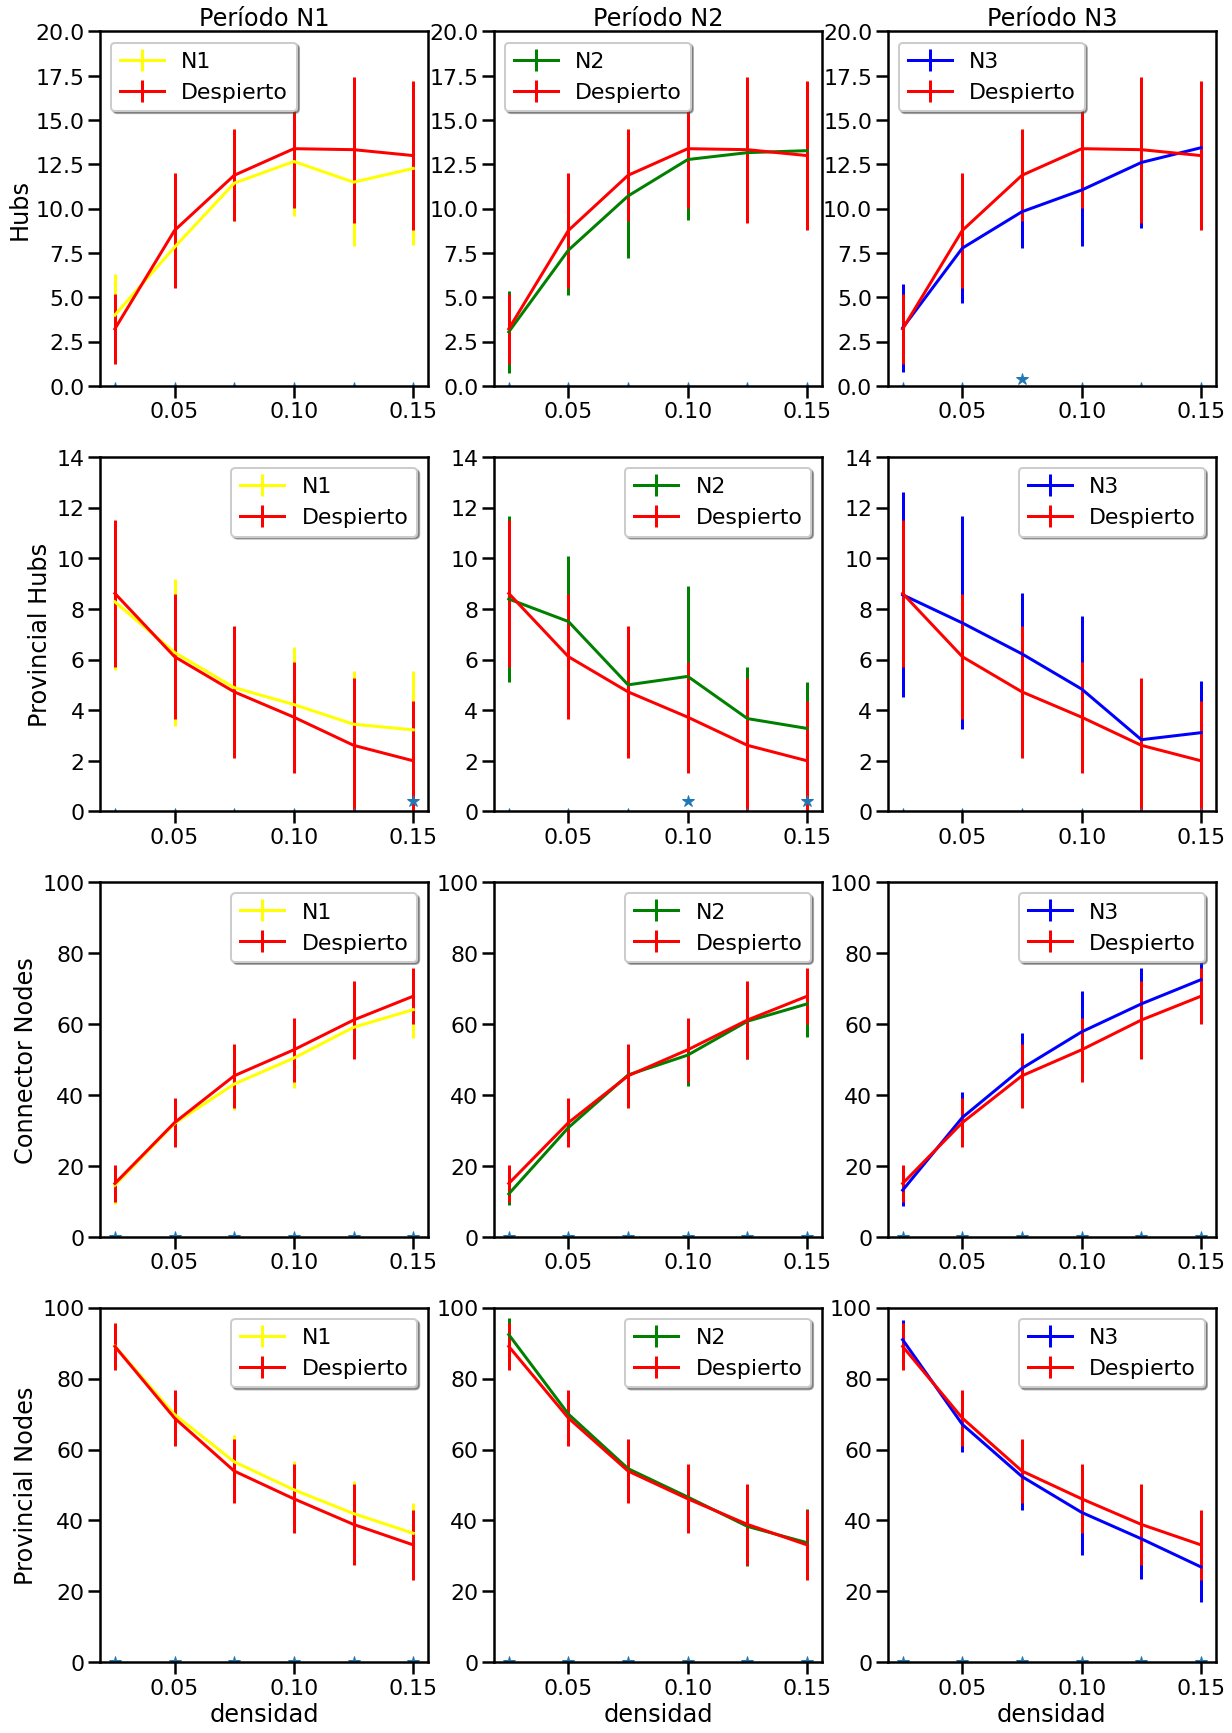

In [ ]:
fig, axs = plt.subplots(4,3,figsize=(20,30))

axs[0,0].errorbar(densidades,  mediasN1[0],stdN1[0], color = 'Blue', label='N1')
axs[0,0].errorbar(densidades, mediasW[0], stdW[0], color = 'Orange', label='Despierto')
axs[0,0].set_title('Período N1')
axs[0,0].plot(densidades, np.array(np.array(pN1[0])<0.05, dtype=float) * 1/2-0.1, '+')
axs[0,0].legend(loc="upper left", shadow=True, fancybox=True)
axs[0,0].set_ylim([0,20])
axs[0,0].set(ylabel = 'Hubs')

axs[0,1].errorbar(densidades,  mediasN2[0],stdN2[0], color = 'Black', label='N2')
axs[0,1].errorbar(densidades, mediasW[0], stdW[0], color = 'Orange', label='Despierto')
axs[0,1].set_title('Período N2')
axs[0,1].plot(densidades, np.array(np.array(pN2[0])<0.05, dtype=float) * 1/2-0.1, '+')
axs[0,1].legend(loc="upper left", shadow=True, fancybox=True)
axs[0,1].set_ylim([0,20])


axs[0,2].errorbar(densidades,  mediasN3[0],stdN3[0], color = 'Red', label='N3')
axs[0,2].errorbar(densidades, mediasW[0], stdW[0], color = 'Orange', label='Despierto')
axs[0,2].set_title('Período N3')
axs[0,2].plot(densidades, np.array(np.array(pN3[0])<0.05, dtype=float) * 1/2-0.1, '+')
axs[0,2].legend(loc="upper left", shadow=True, fancybox=True)
axs[0,2].set_ylim([0,20])

axs[1,0].errorbar(densidades,  mediasN1[1],stdN1[1], color = 'Blue', label='N1')
axs[1,0].errorbar(densidades, mediasW[1], stdW[1], color = 'Orange', label='Despierto')
axs[1,0].plot(densidades, np.array(np.array(pN1[1])<0.05, dtype=float) * 1/2-0.1, '+')
axs[1,0].legend(loc="upper right", shadow=True, fancybox=True)
axs[1,0].set_ylim([0,14])
axs[1,0].set(ylabel = 'Provincial Hubs')

axs[1,1].errorbar(densidades,  mediasN2[1],stdN2[1], color = 'Black', label='N2')
axs[1,1].errorbar(densidades, mediasW[1], stdW[1], color = 'Orange', label='Despierto')
axs[1,1].plot(densidades, np.array(np.array(pN2[1])<0.05, dtype=float) * 1/2-0.1, '+')
axs[1,1].legend(loc="upper right", shadow=True, fancybox=True)
axs[1,1].set_ylim([0,14])

axs[1,2].errorbar(densidades,  mediasN3[1],stdN3[1], color = 'Red', label='N3')
axs[1,2].errorbar(densidades, mediasW[1], stdW[1], color = 'Orange', label='Despierto')
axs[1,2].plot(densidades, np.array(np.array(pN3[1])<0.05, dtype=float) * 1/2-0.1, '+')
axs[1,2].legend(loc="upper right", shadow=True, fancybox=True)
axs[1,2].set_ylim([0,14])

axs[2,0].errorbar(densidades,  mediasN1[2],stdN1[2], color = 'Blue', label='N1')
axs[2,0].errorbar(densidades, mediasW[2], stdW[2], color = 'Orange', label='Despierto')
axs[2,0].plot(densidades, np.array(np.array(pN1[2])<0.05, dtype=float)*5 , '+')
axs[2,0].legend(loc="upper right", shadow=True, fancybox=True)
axs[2,0].set_ylim([0,100])
axs[2,0].set(ylabel = 'Connector Nodes')

axs[2,1].errorbar(densidades,  mediasN2[2],stdN2[2], color = 'Black', label='N2')
axs[2,1].errorbar(densidades, mediasW[2], stdW[2], color = 'Orange', label='Despierto')
axs[2,1].plot(densidades, np.array(np.array(pN2[2])<0.05, dtype=float)*5 , '+')
axs[2,1].legend(loc="upper right", shadow=True, fancybox=True)
axs[2,1].set_ylim([0,100])

axs[2,2].errorbar(densidades,  mediasN3[2],stdN3[2], color = 'Red', label='N3')
axs[2,2].errorbar(densidades, mediasW[2], stdW[2], color = 'Orange', label='Despierto')
axs[2,2].plot(densidades, np.array(np.array(pN3[2])<0.05, dtype=float)*5 , '+')
axs[2,2].legend(loc="upper right", shadow=True, fancybox=True)
axs[2,2].set_ylim([0,100])

axs[3,0].errorbar(densidades,  mediasN1[3],stdN1[3], color = 'Blue', label='N1')
axs[3,0].errorbar(densidades, mediasW[3], stdW[3], color = 'Orange', label='Despierto')
axs[3,0].plot(densidades, np.array(np.array(pN1[3])<0.05, dtype=float)*5 , '+')
axs[3,0].legend(loc="upper right", shadow=True, fancybox=True)
axs[3,0].set_ylim([0,100])
axs[3,0].set(ylabel = 'Provincial Nodes')
axs[3,0].set(xlabel = 'densidad')

axs[3,1].errorbar(densidades,  mediasN2[3],stdN2[3], color = 'Black', label='N2')
axs[3,1].errorbar(densidades, mediasW[3], stdW[3], color = 'Orange', label='Despierto')
axs[3,1].plot(densidades, np.array(np.array(pN2[3])<0.05, dtype=float)*5 , '+')
axs[3,1].legend(loc="upper right", shadow=True, fancybox=True)
axs[3,1].set_ylim([0,100])
axs[3,1].set(xlabel = 'densidad')

axs[3,2].errorbar(densidades,  mediasN3[3],stdN3[3], color = 'Red', label='N3')
axs[3,2].errorbar(densidades, mediasW[3], stdW[3], color = 'Orange', label='Despierto')
axs[3,2].plot(densidades, np.array(np.array(pN3[3])<0.05, dtype=float)*5 , '+')
axs[3,2].legend(loc="upper right", shadow=True, fancybox=True)
axs[3,2].set_ylim([0,100])
axs[3,2].set(xlabel = 'densidad')


In [ ]:
ML[0][2]

Nodo  Sujeto  ...  coeficiente_de_participacion              Rol
0        0       1  ...                      0.664062   Connector Node
1        1       1  ...                      0.576177              Hub
2        2       1  ...                      0.375000              Hub
3        3       1  ...                      0.480000   Connector Node
4        4       1  ...                      0.000000  Provincial Node
...    ...     ...  ...                           ...              ...
2083   111      18  ...                      0.000000  Provincial Node
2084   112      18  ...                      0.000000   Provincial Hub
2085   113      18  ...                      0.375000   Connector Node
2086   114      18  ...                      0.000000  Provincial Node
2087   115      18  ...                      0.000000  Provincial Node

[2088 rows x 8 columns]

Text(0.5, 0, 'Coeficiente de participación')

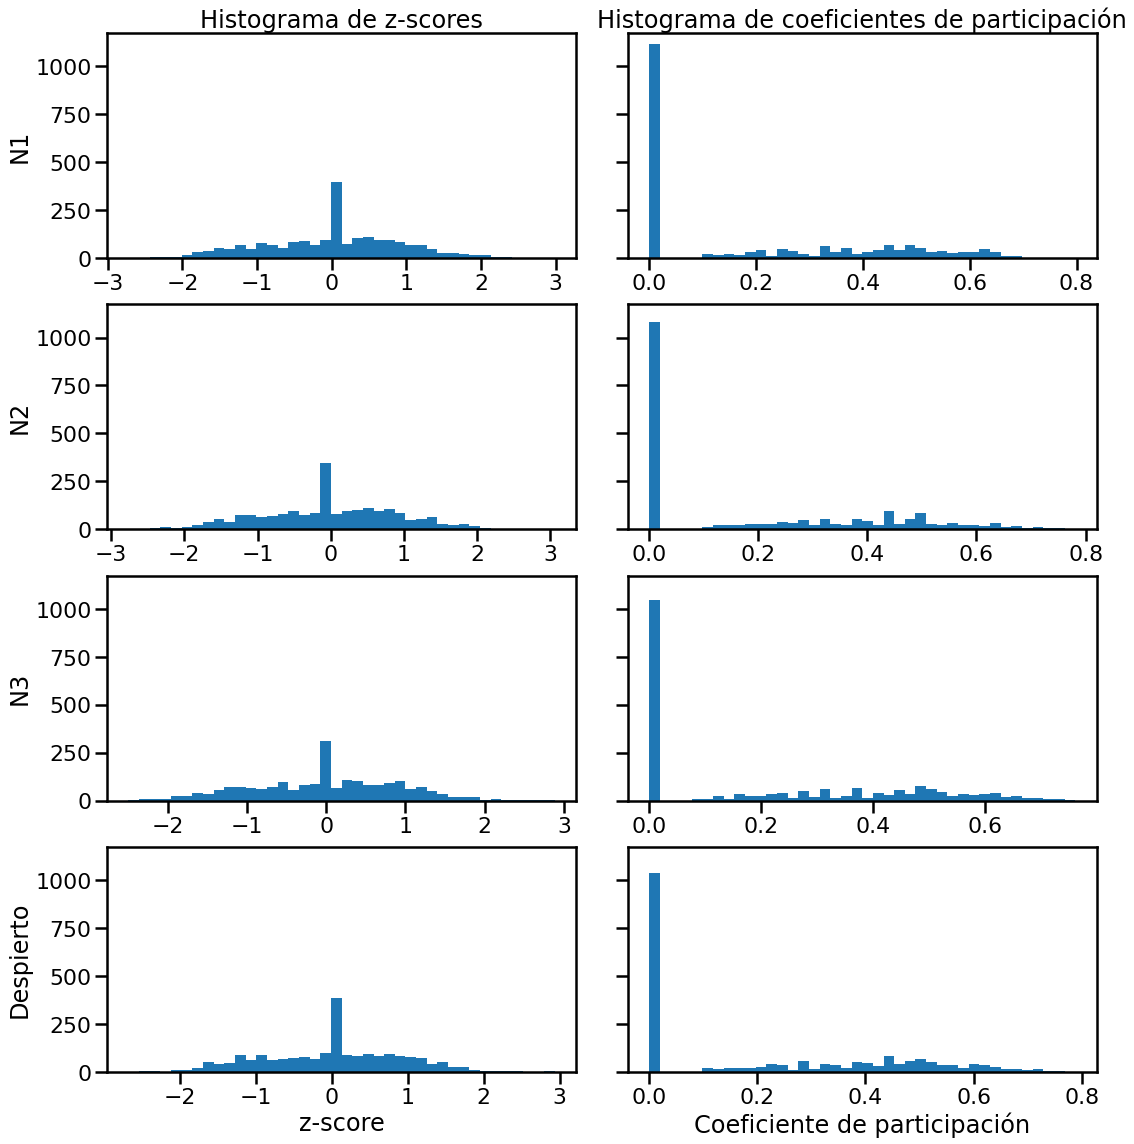

In [ ]:
n_bins = 40

M = [ML[0][2],ML[1][2],ML[2][2],ML[3][2]]

fig, axs = plt.subplots(4, 2, sharey=True, tight_layout=True,figsize=(16,16))

# We can set the number of bins with the `bins` kwarg
axs[0,0].hist(M[0]['z_score'], bins=n_bins);
axs[0,0].set_title('Histograma de z-scores')
axs[0,0].set_ylabel('N1')
axs[0,1].hist(M[0]['coeficiente_de_participacion'], bins=n_bins);
axs[0,1].set_title('Histograma de coeficientes de participación')
axs[1,0].hist(M[1]['z_score'], bins=n_bins);
axs[1,0].set_ylabel('N2')
axs[1,1].hist(M[1]['coeficiente_de_participacion'], bins=n_bins);
axs[2,0].hist(M[2]['z_score'], bins=n_bins);
axs[2,0].set_ylabel('N3')
axs[2,1].hist(M[2]['coeficiente_de_participacion'], bins=n_bins);
axs[3,0].hist(M[3]['z_score'], bins=n_bins);
axs[3,0].set_ylabel('Despierto')
axs[3,0].set_xlabel('z-score')
axs[3,1].hist(M[3]['coeficiente_de_participacion'], bins=n_bins);                                                      
axs[3,1].set_xlabel('Coeficiente de participación')



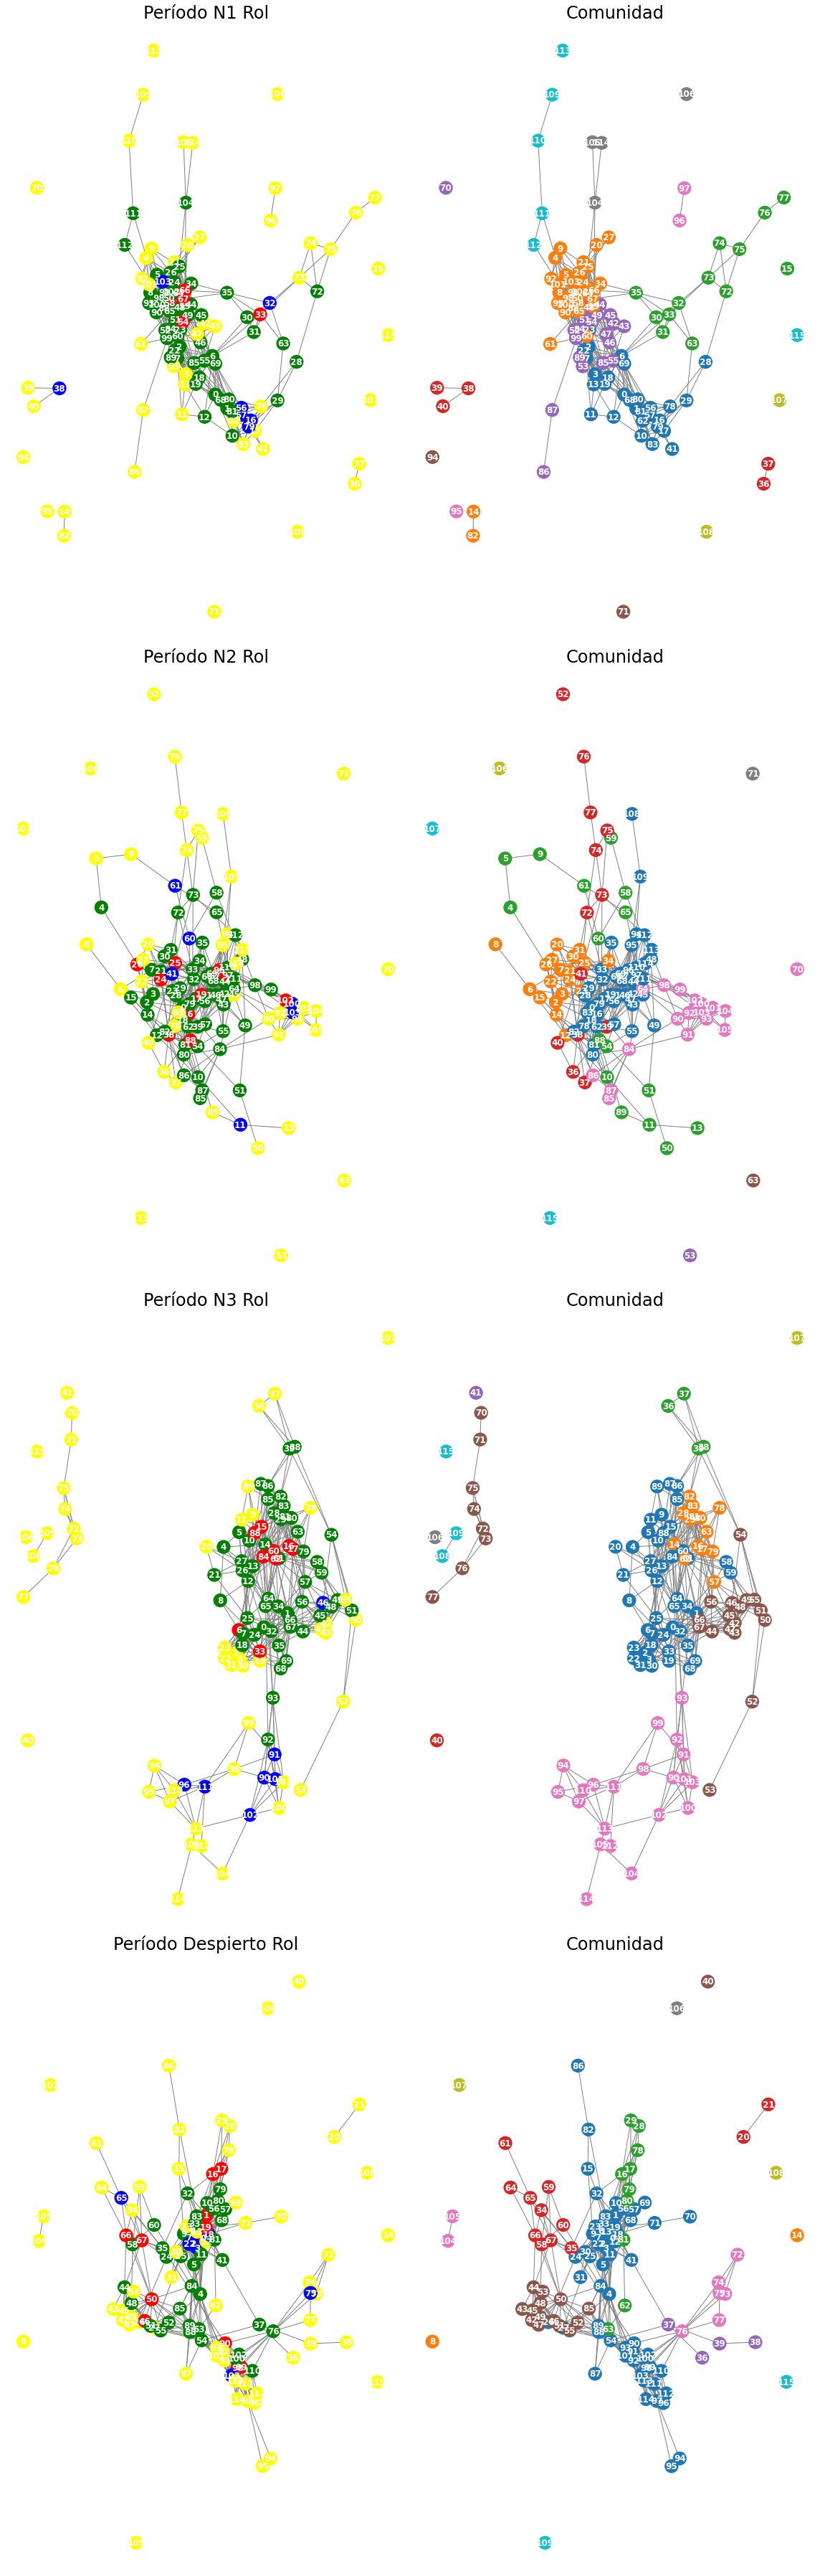

In [ ]:
#Tomo delta = 0,075
#Tomo el sujeto 17

fig, axs = plt.subplots(4,2,figsize=(16,50))
col=0;
MD = [ML[0][2][ML[0][2]['Sujeto'] ==17], ML[1][2][ML[1][2]['Sujeto'] == 17], ML[2][2][ML[2][2]['Sujeto'] == 17], ML[3][2][ML[3][2]['Sujeto'] == 17]]
MN = [all_graphs[0]['N1_suj17'][2], all_graphs[1]['N2_suj17'][2], all_graphs[2]['N3_suj17'][2], all_graphs[3]['W_suj17'][2]]
titulo = ['Período N1 Rol', 'Período N2 Rol', 'Período N3 Rol', 'Período Despierto Rol']
for j in range(4):
  M = MD[j]
  values_per = list(M['Rol'])
  color = []
  for i in range(116):
    if values_per[i] == 'Hub':
      color.append('Orange')
    if values_per[i] == 'Provincial Hub':
      color.append('Green')
    if values_per[i] == 'Connector Node':
      color.append('Violet')
    if values_per[i] == 'Provincial Node':
      color.append('Brown')
    color_comunidad = list(M['comunidad'])
  pos_obs = nx.spring_layout(MN[j],k=0.4) 
  nx.draw(MN[j],pos=pos_obs, with_labels=True,cmap=plt.cm.tab10,font_weight='bold',node_color = color, font_color='white', edge_color='gray',ax=axs[j,0])  
  axs[j,0].set_title(titulo[j]);
  nx.draw(MN[j],pos=pos_obs, with_labels=True,cmap=plt.cm.tab10,font_weight='bold',node_color = color_comunidad, font_color='white', edge_color='gray',ax=axs[j,1])  
  axs[j,1].set_title('Comunidad');
  

plt.tight_layout();


In [ ]:
#Fijo umbrales arbitrarios usados en el paper
#Umbrales del paper
Z = 1
P = 0.05

#Umbrales para prueba. LO CAMBIO AHORA!
Z = 1
P = 0.1

for r in range(4):
  M = ML[r]
  names = totnames[r]
  rol = []
  for a in range(6):
    rol.append([])
  for suj in range(18):
    sujeto = names[suj]
    for j in range(6):
      dataset_general = M[j]
      dataset = dataset_general[dataset_general['Sujeto'] == suj+1]
      rl = rol[j]
      for i in range(116):
        if list(dataset['z_score'])[i] > Z:
          if list(dataset['coeficiente_de_participacion'])[i] > P:
            rl.append('Hub')
          else:
            rl.append('Provincial Hub')
        else:
          if list(dataset['coeficiente_de_participacion'])[i] > P:
            rl.append('Connector Node')
          else:
            rl.append('Provincial Node')
  for j in range(6):
    M[j]['Rol'] = rol[j]


In [ ]:
conteoN1 = pd.DataFrame({'Sujeto': suj_list2, 'Densidad': list(np.linspace(0.25,1.5,6))*18, 'Hubs' : range(108),'Provincial_hubs':range(108), 'Connector_nodes' : range(108),'Provincial_nodes':range(108)})

In [ ]:
conteoN2 = conteoN1.copy()
conteoN3 = conteoN1.copy()
conteoW = conteoN1.copy()
conteo = [conteoN1,conteoN2,conteoN3,conteoW]

In [ ]:
for r in range(4):
  M = ML[r]
  names = totnames[r]
  Connector_Node = []
  Provincial_Node = []
  Provincial_Hub = []
  Hub = []  
  for suj in range(18):
    sujeto = names[suj]
    for j in range(6):
      dataset_general = M[j]
      dataset = dataset_general[dataset_general['Sujeto'] == suj+1]
      cn = sum(dataset['Rol'] == 'Connector Node')
      hh = sum(dataset['Rol'] == 'Hub')
      ph = sum(dataset['Rol'] == 'Provincial Hub')
      pn = sum(dataset['Rol'] == 'Provincial Node')
      Connector_Node.append(cn)
      Hub.append(hh)
      Provincial_Hub.append(ph)
      Provincial_Node.append(pn)
  conteo[r]['Hubs'] = Hub
  conteo[r]['Provincial_hubs'] = Provincial_Hub
  conteo[r]['Connector_nodes'] = Connector_Node
  conteo[r]['Provincial_nodes'] = Provincial_Node

In [ ]:
for c in conteo:
  c['Densidad'] = c['Densidad']/10

In [ ]:
mediasN1 = [[],[],[],[]]
stdN1 = [[],[],[],[]]
densidades = [0.025,0.05,0.075,0.1,0.125,0.15]
for densidad in densidades:
  cont = conteoN1[conteoN1['Densidad'] == densidad]
  mediasN1[0].append(cont['Hubs'].mean())
  mediasN1[1].append(cont['Provincial_hubs'].mean())
  mediasN1[2].append(cont['Connector_nodes'].mean())
  mediasN1[3].append(cont['Provincial_nodes'].mean())
  stdN1[0].append(cont['Hubs'].std())
  stdN1[1].append(cont['Provincial_hubs'].std())
  stdN1[2].append(cont['Connector_nodes'].std())
  stdN1[3].append(cont['Provincial_nodes'].std())

mediasN2 = [[],[],[],[]]
stdN2 = [[],[],[],[]]
for densidad in densidades:
  cont = conteoN2[conteoN2['Densidad'] == densidad]
  mediasN2[0].append(cont['Hubs'].mean())
  mediasN2[1].append(cont['Provincial_hubs'].mean())
  mediasN2[2].append(cont['Connector_nodes'].mean())
  mediasN2[3].append(cont['Provincial_nodes'].mean())
  stdN2[0].append(cont['Hubs'].std())
  stdN2[1].append(cont['Provincial_hubs'].std())
  stdN2[2].append(cont['Connector_nodes'].std())
  stdN2[3].append(cont['Provincial_nodes'].std())

mediasN3 = [[],[],[],[]]
stdN3 = [[],[],[],[]]
for densidad in densidades:
  cont = conteoN3[conteoN3['Densidad'] == densidad]
  mediasN3[0].append(cont['Hubs'].mean())
  mediasN3[1].append(cont['Provincial_hubs'].mean())
  mediasN3[2].append(cont['Connector_nodes'].mean())
  mediasN3[3].append(cont['Provincial_nodes'].mean())
  stdN3[0].append(cont['Hubs'].std())
  stdN3[1].append(cont['Provincial_hubs'].std())
  stdN3[2].append(cont['Connector_nodes'].std())
  stdN3[3].append(cont['Provincial_nodes'].std())

mediasW = [[],[],[],[]]
stdW = [[],[],[],[]]
for densidad in densidades:
  cont = conteoW[conteoW['Densidad'] == densidad]
  mediasW[0].append(cont['Hubs'].mean())
  mediasW[1].append(cont['Provincial_hubs'].mean())
  mediasW[2].append(cont['Connector_nodes'].mean())
  mediasW[3].append(cont['Provincial_nodes'].mean())
  stdW[0].append(cont['Hubs'].std())
  stdW[1].append(cont['Provincial_hubs'].std())
  stdW[2].append(cont['Connector_nodes'].std())
  stdW[3].append(cont['Provincial_nodes'].std())

In [ ]:
HubN1 = []
PhN1 = []
CnN1 = []
PnN1 = []

for i in range(1,19):
  data = conteoN1[conteoN1['Sujeto'] == i]
  HubN1.append(list(data['Hubs'])) 
  PhN1.append(list(data['Provincial_hubs']))
  CnN1.append(list(data['Connector_nodes']))
  PnN1.append(list(data['Provincial_nodes']))

HubN2 = []
PhN2 = []
CnN2 = []
PnN2 = []

for i in range(1,19):
  data = conteoN2[conteoN2['Sujeto'] == i]
  HubN2.append(list(data['Hubs'])) 
  PhN2.append(list(data['Provincial_hubs']))
  CnN2.append(list(data['Connector_nodes']))
  PnN2.append(list(data['Provincial_nodes']))

HubN3 = []
PhN3 = []
CnN3 = []
PnN3 = []

for i in range(1,19):
  data = conteoN3[conteoN3['Sujeto'] == i]
  HubN3.append(list(data['Hubs'])) 
  PhN3.append(list(data['Provincial_hubs']))
  CnN3.append(list(data['Connector_nodes']))
  PnN3.append(list(data['Provincial_nodes']))

HubW = []
PhW = []
CnW = []
PnW = []

for i in range(1,19):
  data = conteoW[conteoW['Sujeto'] == i]
  HubW.append(list(data['Hubs'])) 
  PhW.append(list(data['Provincial_hubs']))
  CnW.append(list(data['Connector_nodes']))
  PnW.append(list(data['Provincial_nodes']))

In [ ]:
pN1 = [testRel(HubN1, HubW),testRel(PhN1,PhW), testRel(CnN1,CnW),testRel(PnN1,PnW)]
pN2 = [testRel(HubN2, HubW),testRel(PhN2,PhW), testRel(CnN2,CnW),testRel(PnN2,PnW)]
pN3 = [testRel(HubN3, HubW),testRel(PhN3,PhW), testRel(CnN3,CnW),testRel(PnN3,PnW)]

[Text(0.5, 0, 'densidad')]

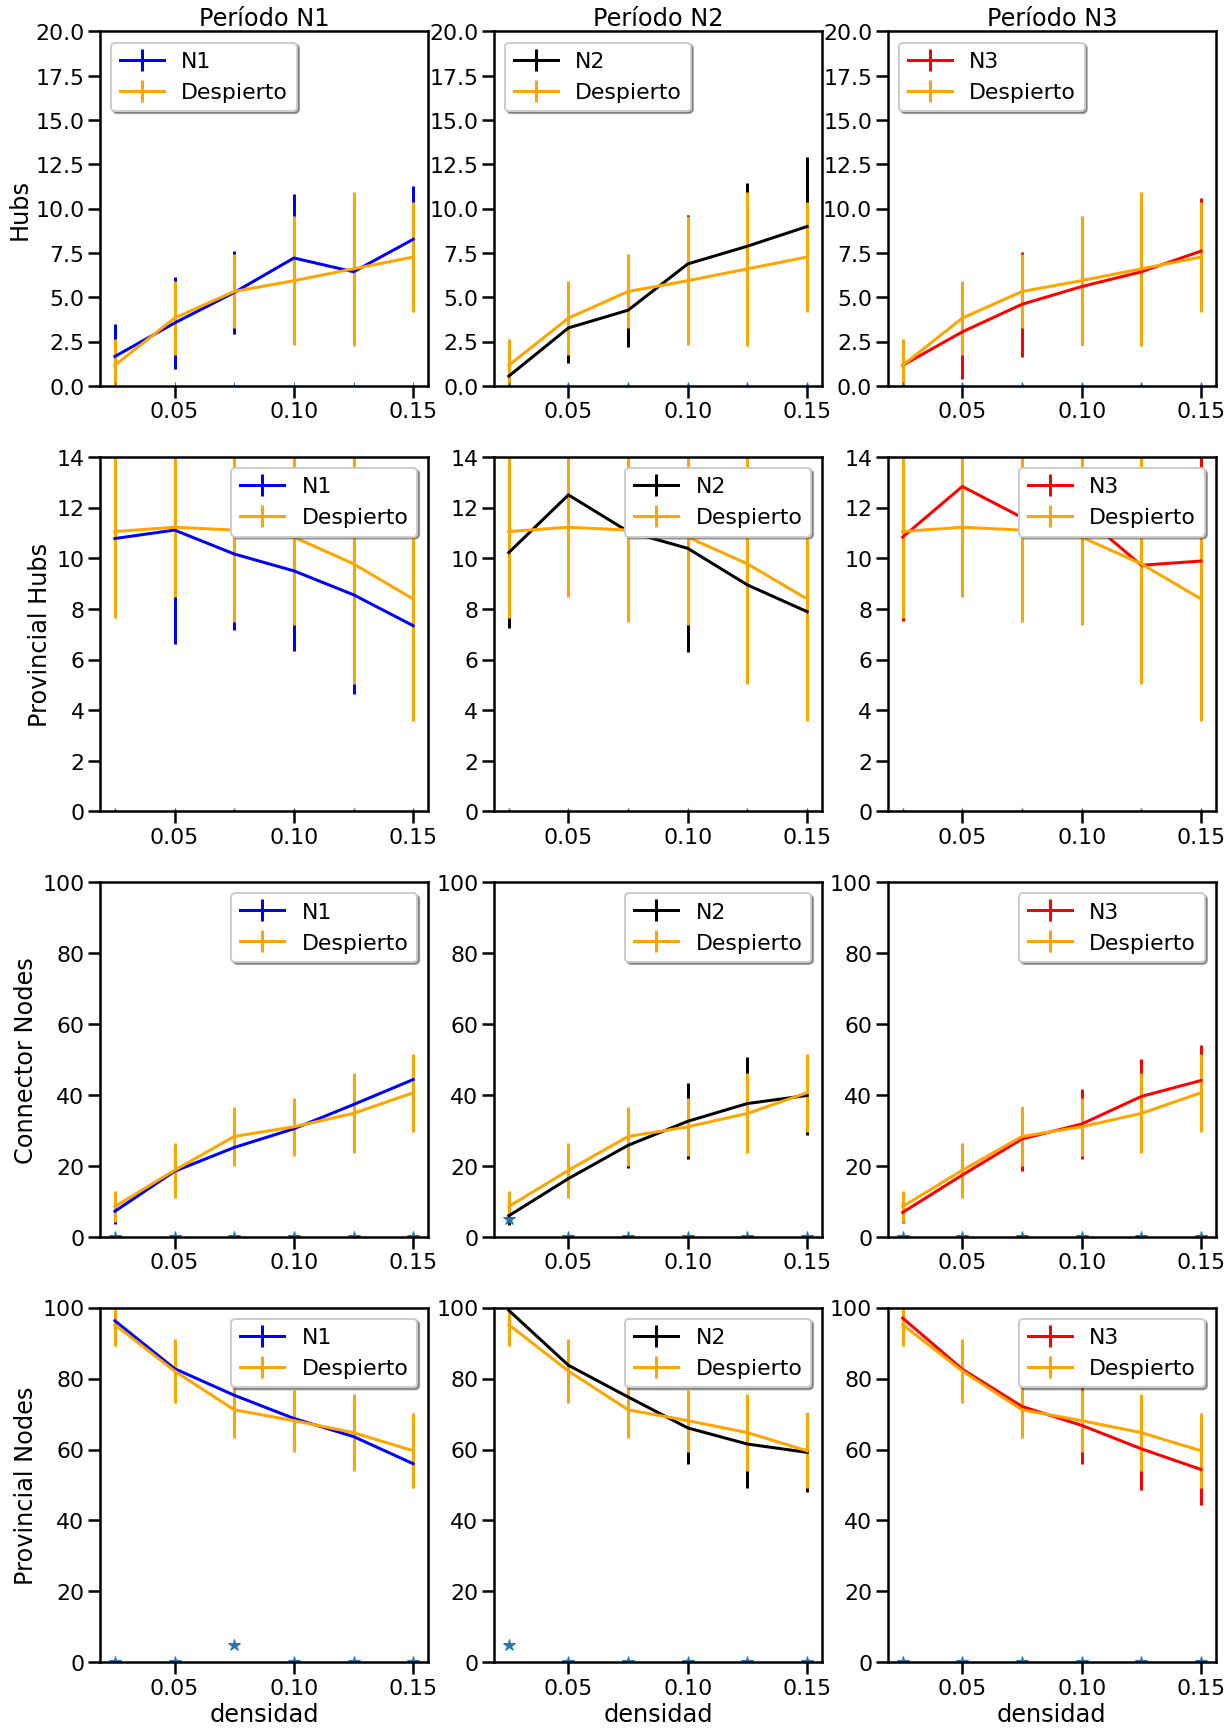

In [ ]:
fig, axs = plt.subplots(4,3,figsize=(20,30))

axs[0,0].errorbar(densidades,  mediasN1[0],stdN1[0], color = 'Blue', label='N1')
axs[0,0].errorbar(densidades, mediasW[0], stdW[0], color = 'Orange', label='Despierto')
axs[0,0].set_title('Período N1')
axs[0,0].plot(densidades, np.array(np.array(pN1[0])<0.05, dtype=float) * 1/2-0.1, '+')
axs[0,0].legend(loc="upper left", shadow=True, fancybox=True)
axs[0,0].set_ylim([0,20])
axs[0,0].set(ylabel = 'Hubs')

axs[0,1].errorbar(densidades,  mediasN2[0],stdN2[0], color = 'Black', label='N2')
axs[0,1].errorbar(densidades, mediasW[0], stdW[0], color = 'Orange', label='Despierto')
axs[0,1].set_title('Período N2')
axs[0,1].plot(densidades, np.array(np.array(pN2[0])<0.05, dtype=float) * 1/2-0.1, '+')
axs[0,1].legend(loc="upper left", shadow=True, fancybox=True)
axs[0,1].set_ylim([0,20])


axs[0,2].errorbar(densidades,  mediasN3[0],stdN3[0], color = 'Red', label='N3')
axs[0,2].errorbar(densidades, mediasW[0], stdW[0], color = 'Orange', label='Despierto')
axs[0,2].set_title('Período N3')
axs[0,2].plot(densidades, np.array(np.array(pN3[0])<0.05, dtype=float) * 1/2-0.1, '+')
axs[0,2].legend(loc="upper left", shadow=True, fancybox=True)
axs[0,2].set_ylim([0,20])

axs[1,0].errorbar(densidades,  mediasN1[1],stdN1[1], color = 'Blue', label='N1')
axs[1,0].errorbar(densidades, mediasW[1], stdW[1], color = 'Orange', label='Despierto')
axs[1,0].plot(densidades, np.array(np.array(pN1[1])<0.05, dtype=float) * 1/2-0.1, '+')
axs[1,0].legend(loc="upper right", shadow=True, fancybox=True)
axs[1,0].set_ylim([0,14])
axs[1,0].set(ylabel = 'Provincial Hubs')

axs[1,1].errorbar(densidades,  mediasN2[1],stdN2[1], color = 'Black', label='N2')
axs[1,1].errorbar(densidades, mediasW[1], stdW[1], color = 'Orange', label='Despierto')
axs[1,1].plot(densidades, np.array(np.array(pN2[1])<0.05, dtype=float) * 1/2-0.1, '+')
axs[1,1].legend(loc="upper right", shadow=True, fancybox=True)
axs[1,1].set_ylim([0,14])

axs[1,2].errorbar(densidades,  mediasN3[1],stdN3[1], color = 'Red', label='N3')
axs[1,2].errorbar(densidades, mediasW[1], stdW[1], color = 'Orange', label='Despierto')
axs[1,2].plot(densidades, np.array(np.array(pN3[1])<0.05, dtype=float) * 1/2-0.1, '+')
axs[1,2].legend(loc="upper right", shadow=True, fancybox=True)
axs[1,2].set_ylim([0,14])

axs[2,0].errorbar(densidades,  mediasN1[2],stdN1[2], color = 'Blue', label='N1')
axs[2,0].errorbar(densidades, mediasW[2], stdW[2], color = 'Orange', label='Despierto')
axs[2,0].plot(densidades, np.array(np.array(pN1[2])<0.05, dtype=float)*5 , '+')
axs[2,0].legend(loc="upper right", shadow=True, fancybox=True)
axs[2,0].set_ylim([0,100])
axs[2,0].set(ylabel = 'Connector Nodes')

axs[2,1].errorbar(densidades,  mediasN2[2],stdN2[2], color = 'Black', label='N2')
axs[2,1].errorbar(densidades, mediasW[2], stdW[2], color = 'Orange', label='Despierto')
axs[2,1].plot(densidades, np.array(np.array(pN2[2])<0.05, dtype=float)*5 , '+')
axs[2,1].legend(loc="upper right", shadow=True, fancybox=True)
axs[2,1].set_ylim([0,100])

axs[2,2].errorbar(densidades,  mediasN3[2],stdN3[2], color = 'Red', label='N3')
axs[2,2].errorbar(densidades, mediasW[2], stdW[2], color = 'Orange', label='Despierto')
axs[2,2].plot(densidades, np.array(np.array(pN3[2])<0.05, dtype=float)*5 , '+')
axs[2,2].legend(loc="upper right", shadow=True, fancybox=True)
axs[2,2].set_ylim([0,100])

axs[3,0].errorbar(densidades,  mediasN1[3],stdN1[3], color = 'Blue', label='N1')
axs[3,0].errorbar(densidades, mediasW[3], stdW[3], color = 'Orange', label='Despierto')
axs[3,0].plot(densidades, np.array(np.array(pN1[3])<0.05, dtype=float)*5 , '+')
axs[3,0].legend(loc="upper right", shadow=True, fancybox=True)
axs[3,0].set_ylim([0,100])
axs[3,0].set(ylabel = 'Provincial Nodes')
axs[3,0].set(xlabel = 'densidad')

axs[3,1].errorbar(densidades,  mediasN2[3],stdN2[3], color = 'Black', label='N2')
axs[3,1].errorbar(densidades, mediasW[3], stdW[3], color = 'Orange', label='Despierto')
axs[3,1].plot(densidades, np.array(np.array(pN2[3])<0.05, dtype=float)*5 , '+')
axs[3,1].legend(loc="upper right", shadow=True, fancybox=True)
axs[3,1].set_ylim([0,100])
axs[3,1].set(xlabel = 'densidad')

axs[3,2].errorbar(densidades,  mediasN3[3],stdN3[3], color = 'Red', label='N3')
axs[3,2].errorbar(densidades, mediasW[3], stdW[3], color = 'Orange', label='Despierto')
axs[3,2].plot(densidades, np.array(np.array(pN3[3])<0.05, dtype=float)*5 , '+')
axs[3,2].legend(loc="upper right", shadow=True, fancybox=True)
axs[3,2].set_ylim([0,100])
axs[3,2].set(xlabel = 'densidad')


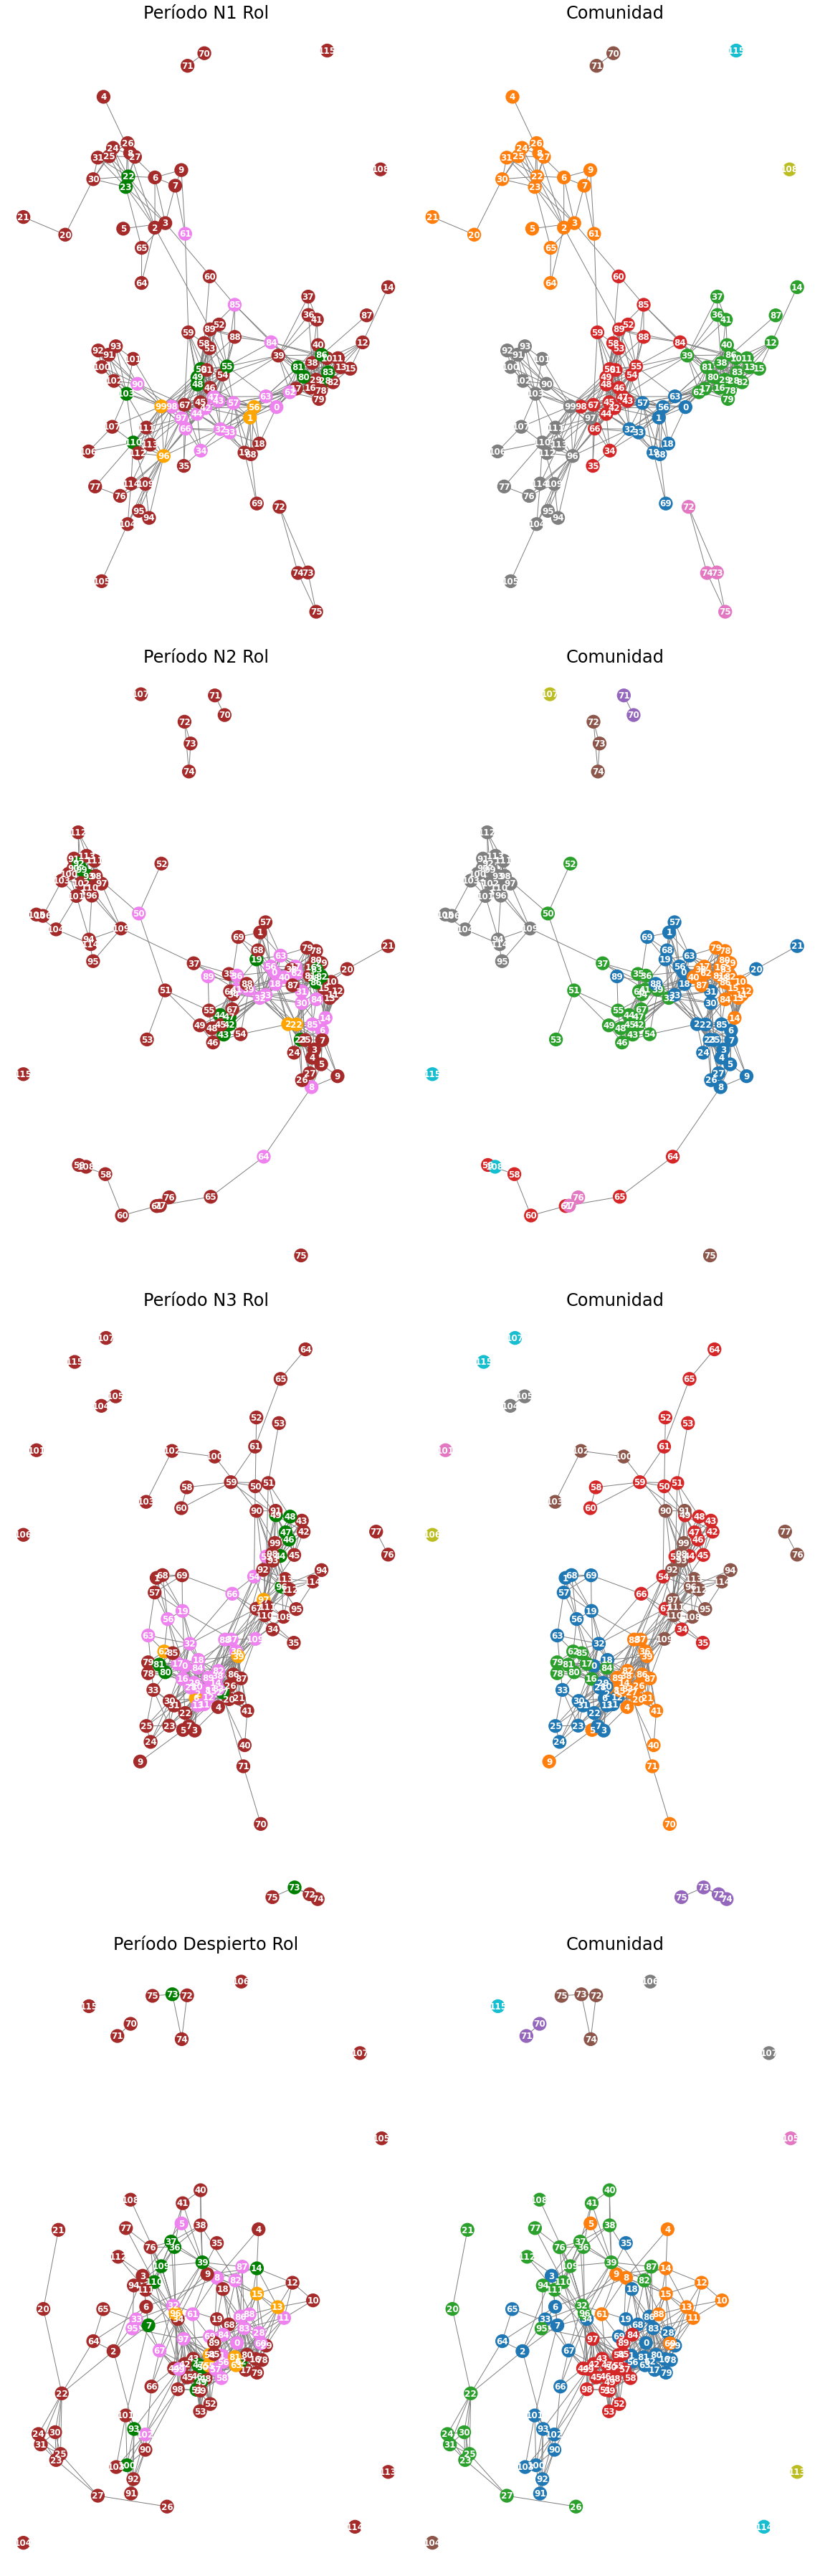

In [ ]:
#Tomo delta = 0,075
#Tomo el sujeto 17

fig, axs = plt.subplots(4,2,figsize=(16,50))
col=0;
MD = [ML[0][2][ML[0][2]['Sujeto'] ==17], ML[1][2][ML[1][2]['Sujeto'] == 17], ML[2][2][ML[2][2]['Sujeto'] == 17], ML[3][2][ML[3][2]['Sujeto'] == 17]]
MN = [all_graphs[0]['N1_suj17'][2], all_graphs[1]['N2_suj17'][2], all_graphs[2]['N3_suj17'][2], all_graphs[3]['W_suj17'][2]]
titulo = ['Período N1 Rol', 'Período N2 Rol', 'Período N3 Rol', 'Período Despierto Rol']
for j in range(4):
  M = MD[j]
  values_per = list(M['Rol'])
  color = []
  for i in range(116):
    if values_per[i] == 'Hub':
      color.append('Orange')
    if values_per[i] == 'Provincial Hub':
      color.append('Green')
    if values_per[i] == 'Connector Node':
      color.append('Violet')
    if values_per[i] == 'Provincial Node':
      color.append('Brown')
    color_comunidad = list(M['comunidad'])
  pos_obs = nx.spring_layout(MN[j],k=0.4) 
  nx.draw(MN[j],pos=pos_obs, with_labels=True,cmap=plt.cm.tab10,font_weight='bold',node_color = color, font_color='white', edge_color='gray',ax=axs[j,0])  
  axs[j,0].set_title(titulo[j]);
  nx.draw(MN[j],pos=pos_obs, with_labels=True,cmap=plt.cm.tab10,font_weight='bold',node_color = color_comunidad, font_color='white', edge_color='gray',ax=axs[j,1])  
  axs[j,1].set_title('Comunidad');
  

plt.tight_layout();